<a href="https://colab.research.google.com/github/ashmeer/PAZ-Pred/blob/main/May27_newResult_bbb_IND_alzheimer_resultsComputed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, LeaveOneOut, train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import re
import os
import warnings
import logging
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier, Perceptron
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
# from catboost import CatBoostClassifier
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

seed = np.random.seed(5)
inputSize=522
# Load your dataset
dataset = pd.read_csv('/content/drive/MyDrive/alz-balance-FV.csv', sep=',',header=None)

# Define a function to replace specific text values in the DataFrame
def replace_text_in_dataframe(dataframe, text='#NAME?', replacement=0):
    return dataframe.applymap(lambda x: replacement if str(x) == text else x)

# Replace specific text values in the dataset
dataset = replace_text_in_dataframe(dataset)

# Replace NaN values with 0 in the entire dataset
dataset = dataset.fillna(0)

# Replace infinity values with a large finite number
numeric_cols = dataset.select_dtypes(include=[np.number])

for column in numeric_cols.columns:
    dataset[column].replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaNs introduced by the replacement of infinities
dataset = dataset.fillna(0)

# Check the first few rows of the dataset to confirm changes
print(dataset.head())

# Ensure that all data is of numeric type (float32)
dataset = dataset.astype('float32')

# Separate features (X) and target variable (y)
X = dataset.iloc[:, :-1].values  # Assuming the last column is the target variable
y = dataset.iloc[:, -1].values


<ipython-input-3-3bdcc0d32eea>:7: DtypeWarning: Columns (57,60,62,63,103,109) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('/content/drive/MyDrive/alz-balance-FV.csv', sep=',',header=None)


     0        1          2             3        4          5             6    \
0   8857   357892   19175068  1.155648e+09   358140   14436987  7.729948e+08   
1   2318    47766    1291882  3.929923e+07    47078     973938  2.640892e+07   
2  57004  5764737  775196721  1.170000e+11  5743994  579405577  7.780258e+10   
3   1947    39521    1072121  3.283969e+07    37944     765453  2.078980e+07   
4   6452   223893   10348103  5.381722e+08   222027    7680657  3.548677e+08   

         7             8             9    ...     513      514      515  \
0   19217404  7.716718e+08  1.157209e+09  ...    9028    32676    59205   
1    1236792  2.563788e+07  3.674105e+07  ...    1115      904     1899   
2  766477410  7.715775e+10  1.150000e+11  ...  356148  1087205  1959192   
3    1002006  2.007115e+07  2.999161e+07  ...       0      912     4342   
4   10165539  3.508799e+08  5.224735e+08  ...     365    16252    27072   

       516      517      518      519      520  521  522  
0    3086

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

std_scale = MinMaxScaler()
X = np.nan_to_num(X.astype('float32'))
X_scaled = std_scale.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:483: RuntimeWarning: overflow encountered in subtract
  data_range = data_max - data_min
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [5]:
dataset

0           1             2             3           4    \
0       8857.0    357892.0  1.917507e+07  1.155648e+09    358140.0   
1       2318.0     47766.0  1.291882e+06  3.929922e+07     47078.0   
2      57004.0   5764737.0  7.751967e+08  1.170000e+11   5743994.0   
3       1947.0     39521.0  1.072121e+06  3.283969e+07     37944.0   
4       6452.0    223893.0  1.034810e+07  5.381722e+08    222027.0   
...        ...         ...           ...           ...         ...   
6516   18261.0    965701.0  6.747298e+07  5.301705e+09    948288.0   
6517   40427.0   3301787.0  3.576580e+08  4.356452e+10   3293125.0   
6518  102396.0  13672684.0  2.430653e+09  4.860000e+11  13627350.0   
6519   34150.0   2577322.0  2.575982e+08  2.893764e+10   2525176.0   
6520  143050.0  21625742.0  4.356126e+09  9.870000e+11  21481304.0   

               5             6             7             8             9    \
0     1.443699e+07  7.729948e+08  1.921740e+07  7.716718e+08  1.157209e+09   
1     9.739380e+05  2.640892e+07  1.236792e+06  2.563788e+07  3.674105e+07   
2     5.794056e+08  7.780259e+10  7.664774e+08  7.715774e+10  1.150000e+11   
3     7.654530e+05  2.078980e+07  1.002006e+06  2.007115e+07  2.999161e+07   
4     7.680657e+06  3.548677e+08  1.016554e+07  3.508799e+08  5.224735e+08   
...            ...           ...           ...           ...           ...   
6516  5.010500e+07  3.498985e+09  6.580253e+07  3.470077e+09  5.142886e+09   
6517  2.693506e+08  2.917422e+10  3.532417e+08  2.889914e+10  4.253522e+10   
6518  1.818362e+09  3.230000e+11  2.411096e+09  3.220000e+11  4.790000e+11   
6519  1.902651e+08  1.898625e+10  2.478863e+08  1.863605e+10  2.734475e+10   
6520  3.242011e+09  6.520000e+11  4.297111e+09  6.480000e+11  9.690000e+11   

      ...        513        514        515        516         517         518  \
0     ...     9028.0    32676.0    59205.0    30863.0     63989.0    139934.0   
1     ...     1115.0      904.0     1899.0     2361.0      3185.0      4681.0   
2     ...   356148.0  1087205.0  1959192.0  1583305.0   2473878.0   4293532.0   
3     ...        0.0      912.0     4342.0     1247.0      2626.0      2384.0   
4     ...      365.0    16252.0    27072.0    14462.0     39852.0     63681.0   
...   ...        ...        ...        ...        ...         ...         ...   
6516  ...    54233.0   178325.0    67221.0   240200.0     74331.0     84309.0   
6517  ...   219637.0   995978.0   508624.0   927688.0    555027.0    451634.0   
6518  ...   863509.0  5382996.0  5324303.0  4912149.0   6362122.0  10798852.0   
6519  ...   111140.0   673405.0   453128.0   349369.0    335932.0    437007.0   
6520  ...  3524755.0  8662654.0  8177445.0  7221690.0  10859380.0  16530786.0   

            519        520  521  522  
0       73331.0    38068.0  0.0  0.0  
1        2115.0     4232.0  0.0  0.0  
2     2526107.0  1786936.0  0.0  0.0  
3        3573.0     4025.0  0.0  0.0  
4       31614.0    23187.0  0.0  0.0  
...         ...        ...  ...  ...  
6516    12350.0   104913.0  0.0  1.0  
6517   178318.0   377742.0  0.0  1.0  
6518  5991263.0  5296897.0  0.0  1.0  
6519   218521.0   429408.0  0.0  1.0  
6520  6062375.0  9276417.0  0.0  1.0  

[6521 rows x 523 columns]

In [6]:
clf2=LGBMClassifier()
clf1=RandomForestClassifier(n_estimators=100, max_depth=50, oob_score=True, n_jobs=-1, warm_start=True)
clf3 = XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1)
clf4=ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2)
clf6= BaggingClassifier()
clf7= SVC(kernel='linear')
clf8=KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')

# Define your meta-learner
lr = LogisticRegression(random_state=42)

# Define your stacking classifier with the base learners and meta-learner
clf5 = StackingClassifier(
    estimators=[('xgb', clf3),('rf', clf1) ],final_estimator=lr)

In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=seed)
print('Independent Dataset Test Random Forest')
clf=clf1.fit(X_train, Y_train)
pred=np.round(clf.predict(X_test))
tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs=[0 for _ in range(len(Y_test))]
lr_probs=clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs=lr_probs[:, 1]

# calculate roc curves
ns_fpr1, ns_tpr1, _=roc_curve(Y_test, ns_probs)
lr_fpr1, lr_tpr1, _=roc_curve(Y_test, lr_probs)
auc_score = round(roc_auc_score(Y_test, lr_probs),2)

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=seed)
print('Independent Dataset KNN')
clf=clf8.fit(X_train, Y_train)
pred=np.round(clf.predict(X_test))
tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs8=[0 for _ in range(len(Y_test))]
lr_probs8=clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs8=lr_probs8[:, 1]

# calculate roc curves
ns_fpr8, ns_tpr8, _=roc_curve(Y_test, ns_probs8)
lr_fpr8, lr_tpr8, _=roc_curve(Y_test, lr_probs8)
auc_score = round(roc_auc_score(Y_test, lr_probs8),2)

Independent Dataset Test Random Forest


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Accuracy: 93.92
Sensitivity/Recall: 96.6
Specificity: 90.76
MCC: 0.8781
Precision: 92.5
F1_Score: 94.51
Independent Dataset KNN
Accuracy: 77.16
Sensitivity/Recall: 76.61
Specificity: 77.83
MCC: 0.54244
Precision: 80.68
F1_Score: 78.59


In [14]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=seed)
print('Independent Dataset Test Random Forest')
clf=clf1.fit(X_train, Y_train)
pred=np.round(clf.predict(X_test))
tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs=[0 for _ in range(len(Y_test))]
lr_probs=clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs=lr_probs[:, 1]

# calculate roc curves
ns_fpr1, ns_tpr1, _=roc_curve(Y_test, ns_probs)
lr_fpr1, lr_tpr1, _=roc_curve(Y_test, lr_probs)
auc_score = round(roc_auc_score(Y_test, lr_probs),2)

print('Independent Dataset Test LG')
clf=clf2.fit(X_train, Y_train)
pred=np.round(clf.predict(X_test))
tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs2=[0 for _ in range(len(Y_test))]
lr_probs2=clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs2=lr_probs2[:, 1]

# calculate roc curves
ns_fpr2, ns_tpr2, _=roc_curve(Y_test, ns_probs2)
lr_fpr2, lr_tpr2, _=roc_curve(Y_test, lr_probs2)
auc_score2 = round(roc_auc_score(Y_test, lr_probs2),2)

print('Independent Dataset Test XGB')
clf=clf3.fit(X_train, Y_train)
pred=np.round(clf.predict(X_test))
tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs3=[0 for _ in range(len(Y_test))]
lr_probs3=clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs3=lr_probs3[:, 1]

# calculate roc curves
ns_fpr3, ns_tpr3, _=roc_curve(Y_test, ns_probs3)
lr_fpr3, lr_tpr3, _=roc_curve(Y_test, lr_probs3)
auc_score3 = round(roc_auc_score(Y_test, lr_probs3),2)

print('Independent Dataset Test Extra Tree')
clf=clf4.fit(X_train, Y_train)
pred=np.round(clf.predict(X_test))
tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs4=[0 for _ in range(len(Y_test))]
lr_probs4=clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs4=lr_probs4[:, 1]

# calculate roc curves
ns_fpr4, ns_tpr4, _=roc_curve(Y_test, ns_probs4)
lr_fpr4, lr_tpr4, _=roc_curve(Y_test, lr_probs4)
auc_score4 = round(roc_auc_score(Y_test, lr_probs4),2)




Independent Dataset Test Random Forest


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Accuracy: 92.95
Sensitivity/Recall: 95.67
Specificity: 90.0
MCC: 0.8596
Precision: 91.19
F1_Score: 93.38
Independent Dataset Test LG
[LightGBM] [Info] Number of positive: 2127, number of negative: 2437
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031771 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 119391
[LightGBM] [Info] Number of data points in the train set: 4564, number of used features: 484
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.466039 -> initscore=-0.136055
[LightGBM] [Info] Start training from score -0.136055
Accuracy: 82.78
Sensitivity/Recall: 85.05
Specificity: 80.32
MCC: 0.65498
Precision: 82.38
F1_Score: 83.69
Independent Dataset Test XGB
Accuracy: 82.37
Sensitivity/Recall: 84.76
Specificity: 79.79
MCC: 0.64679
Precision: 81.94
F1_Score: 83.33
Independent Dataset Test Extra Tree
Accuracy: 80.84
Sensitivity/Recall: 85.45
Specificity: 75.85
MCC: 0.61697
Precision: 79.29
F1_

In [ ]:
print('Independent Dataset Stacking')
clf=clf5.fit(X_train, Y_train)
pred=np.round(clf.predict(X_test))
tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs5=[0 for _ in range(len(Y_test))]
lr_probs5=clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs5=lr_probs5[:, 1]

# calculate roc curves
ns_fpr5, ns_tpr5, _=roc_curve(Y_test, ns_probs5)
lr_fpr5, lr_tpr5, _=roc_curve(Y_test, lr_probs5)
auc_score5 = round(roc_auc_score(Y_test, lr_probs5),2)



print('Independent Dataset Bagging')
clf=clf6.fit(X_train, Y_train)
pred=np.round(clf.predict(X_test))
tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs6=[0 for _ in range(len(Y_test))]
lr_probs6=clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs6=lr_probs6[:, 1]

# calculate roc curves
ns_fpr6, ns_tpr6, _=roc_curve(Y_test, ns_probs6)
lr_fpr6, lr_tpr6, _=roc_curve(Y_test, lr_probs6)
auc_score6 = round(roc_auc_score(Y_test, lr_probs6),2)





Independent Dataset Stacking
Accuracy: 82.12
Sensitivity/Recall: 84.55
Specificity: 79.49
MCC: 0.64171
Precision: 81.65
F1_Score: 83.07
Independent Dataset Bagging
Accuracy: 79.15
Sensitivity/Recall: 84.15
Specificity: 73.75
MCC: 0.58329
Precision: 77.59
F1_Score: 80.74


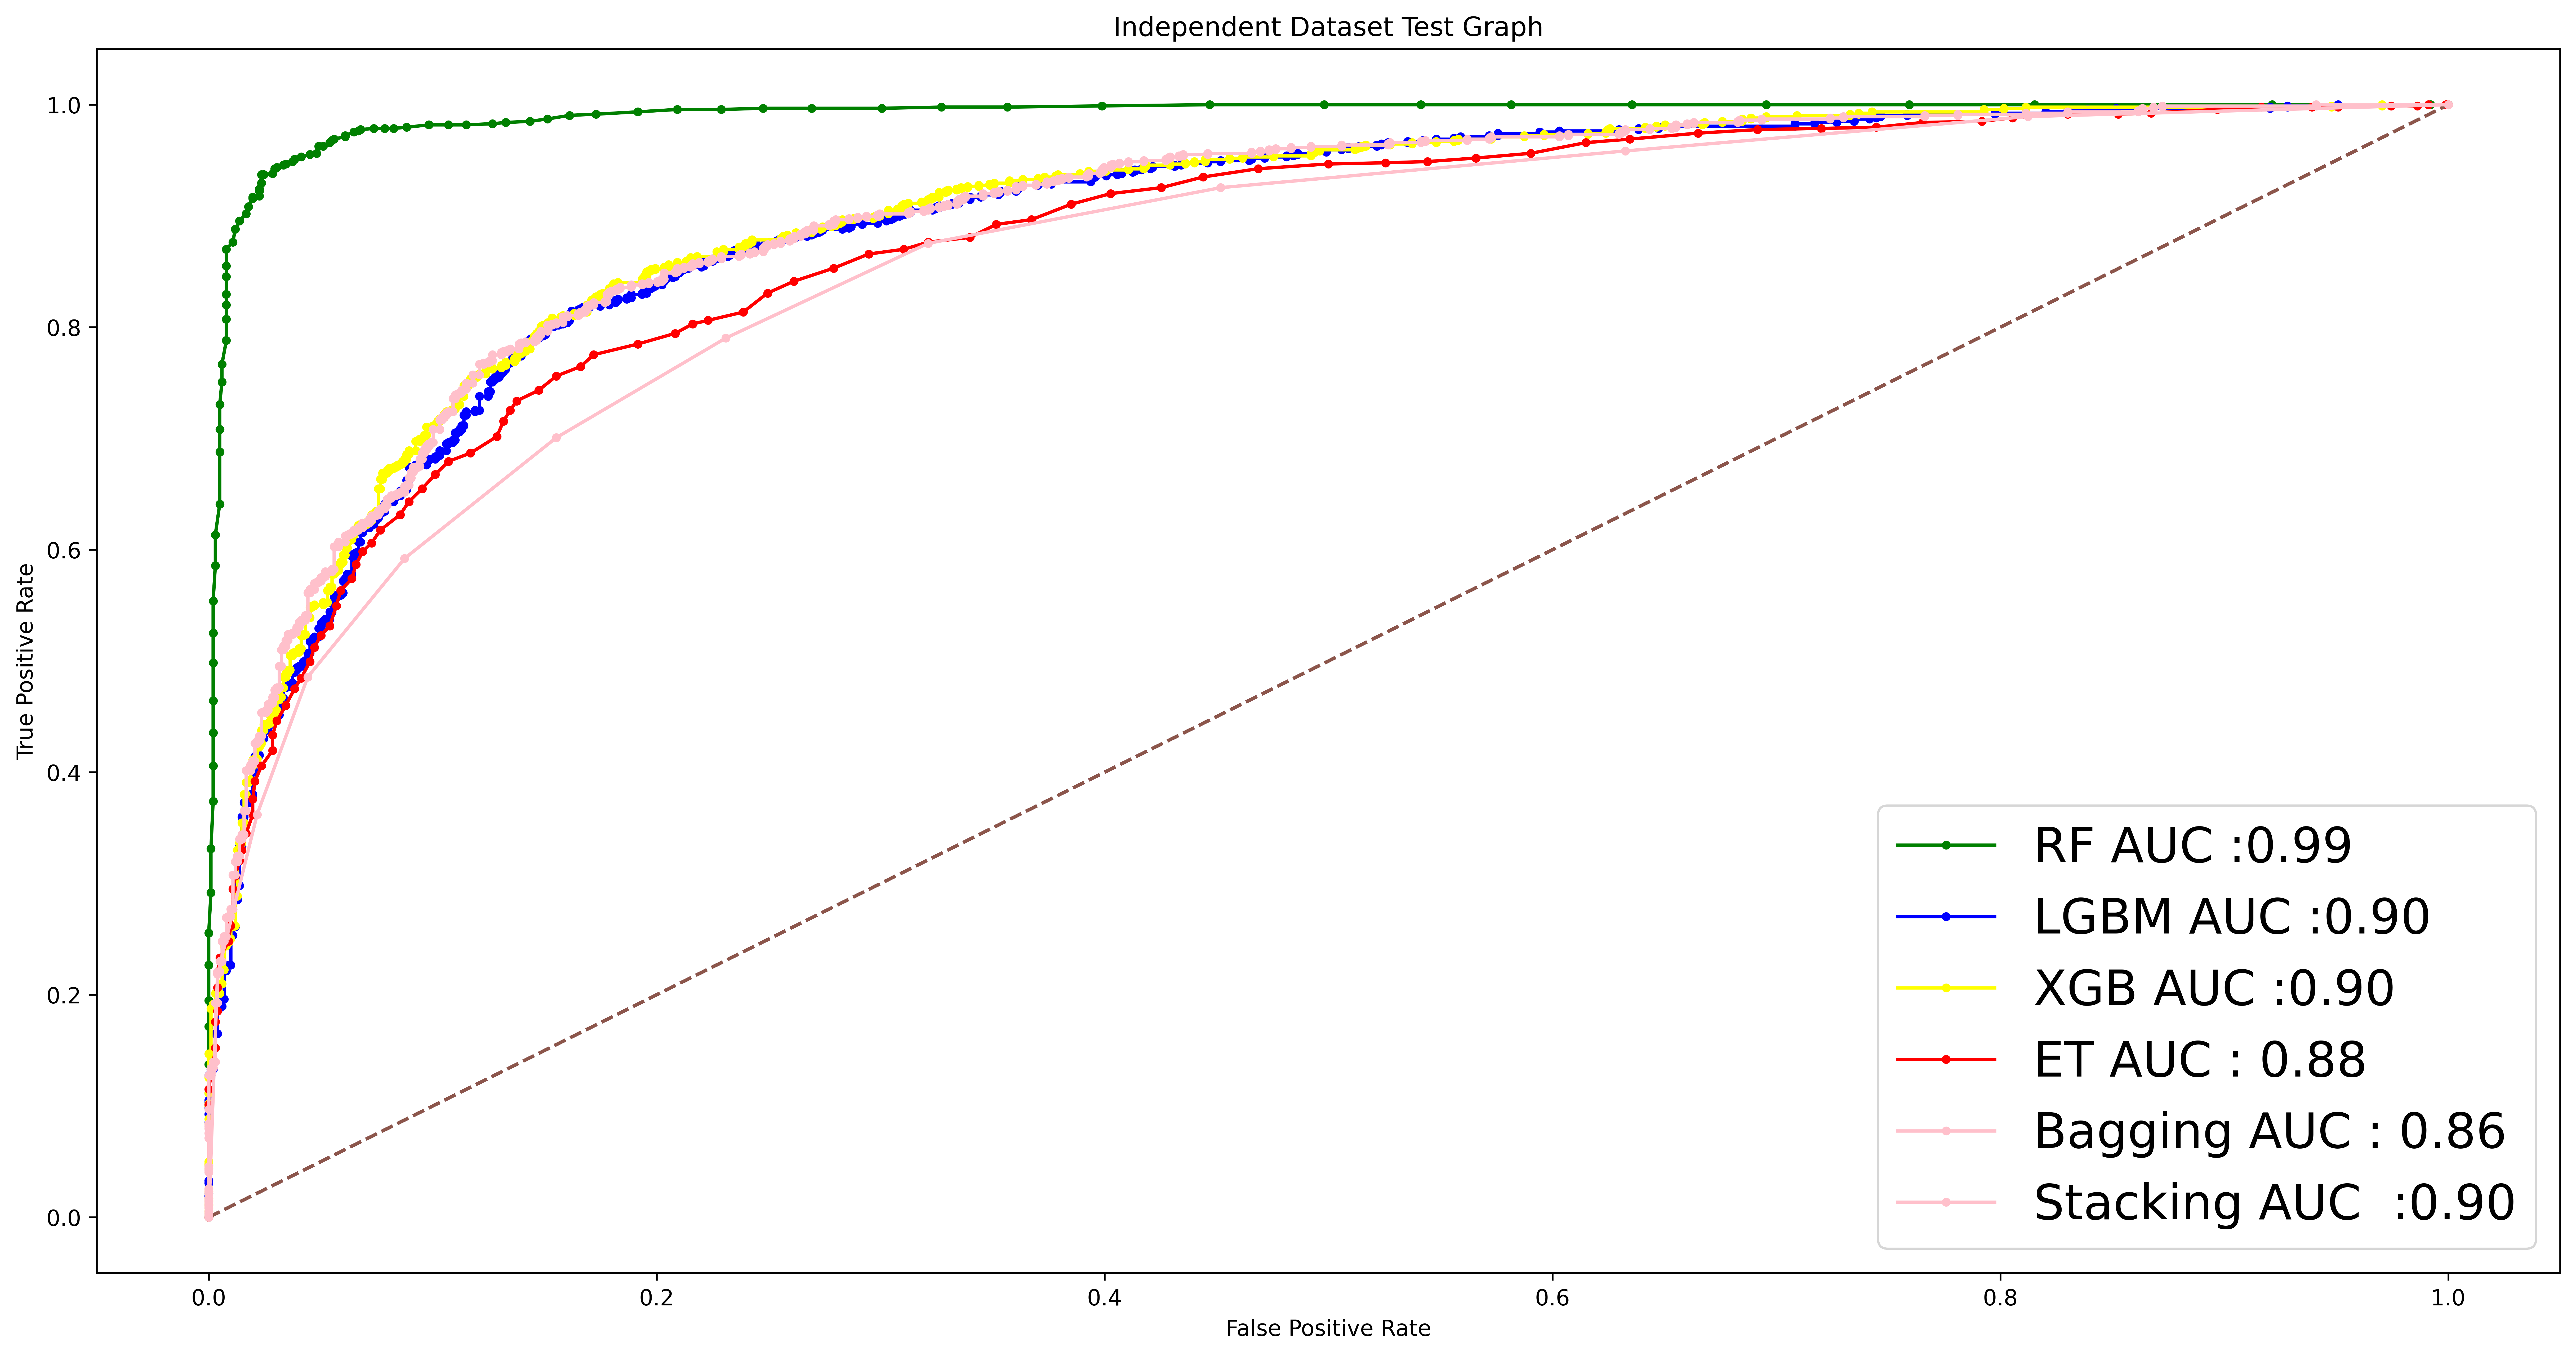

In [ ]:
# replace X1 with X_test and Y1 with y_test
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot

#pyplot.rcParams['figure.dpi'] = 200

pyplot.figure(figsize=(20, 10), dpi=600)

# plot the roc curve for the model
#plt.plot(lr_fpr1, lr_tpr1, marker='.', color='green', label=f'RF AUC : {auc_score:.3f}')
#plt.plot(lr_fpr1, lr_tpr1, marker='.', color='green', label='RF AUC : {:.3f}'.format(auc_score))

pyplot.title("Independent Dataset Test Graph")
pyplot.plot(ns_fpr1, ns_tpr1, linestyle='--')
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', color='green', label='RF AUC :{:.2f}'.format(auc_score))

pyplot.plot(ns_fpr2, ns_tpr2, linestyle='--')
pyplot.plot(lr_fpr2, lr_tpr2, marker='.', color='blue', label='LGBM AUC :{:.2f}'.format(auc_score2))

pyplot.plot(ns_fpr3, ns_tpr3, linestyle='--')
pyplot.plot(lr_fpr3, lr_tpr3, marker='.', color='yellow', label='XGB AUC :{:.2f}'.format(auc_score3))

pyplot.plot(ns_fpr4, ns_tpr4, linestyle='--')
pyplot.plot(lr_fpr4, lr_tpr4, marker='.', color='red', label='ET AUC : '+str(auc_score4))

pyplot.plot(ns_fpr6, ns_tpr6, linestyle='--')
pyplot.plot(lr_fpr6, lr_tpr6, marker='.', color='pink', label='Bagging AUC : '+str(auc_score6))

pyplot.plot(ns_fpr5, ns_tpr5, linestyle='--')
pyplot.plot(lr_fpr5, lr_tpr5, marker='.', color='pink', label='Stacking AUC  :{:.2f}'.format(auc_score5))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend(loc="lower right", fontsize=22, ncol=1)
# show the plot
pyplot.show()



# **10-Fold**

In [ ]:
cv=10

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold

In [ ]:
clf2=LGBMClassifier()
clf1=RandomForestClassifier(n_estimators=100, max_depth=50, oob_score=True, n_jobs=-1, warm_start=True)
clf3 = XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1)
clf4=ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2)
clf6= BaggingClassifier()
clf7= SVC(kernel='linear')

# Define your meta-learner
lr = LogisticRegression(random_state=42)

# Define your stacking classifier with the base learners and meta-learner
clf5 = StackingClassifier(
    estimators=[('xgb', clf3),('rf', clf1) ],final_estimator=lr)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
rf10=cross_val_predict(clf1,X, y, cv=10,method='predict_proba')
lgbm10=cross_val_predict(clf2,X, y, cv=10,method='predict_proba')
xgb10=cross_val_predict(clf3,X, y, cv=10,method='predict_proba')
et10=cross_val_predict(clf4,X, y, cv=10,method='predict_proba')
st10=cross_val_predict(clf5,X, y, cv=10,method='predict_proba')
bagging10=cross_val_predict(clf6,X, y, cv=10,method='predict_proba')

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid v

[LightGBM] [Info] Number of positive: 2760, number of negative: 3108
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074704 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 122157
[LightGBM] [Info] Number of data points in the train set: 5868, number of used features: 516
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.470348 -> initscore=-0.118749
[LightGBM] [Info] Start training from score -0.118749
[LightGBM] [Info] Number of positive: 2761, number of negative: 3108
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076325 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 122161
[LightGBM] [Info] Number of data points in the train set: 5869, number of used features: 516
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.470438 -> initscore=-0.118386
[LightGBM] [Info] Start training from score -0.118386
[LightGBM] [

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid v

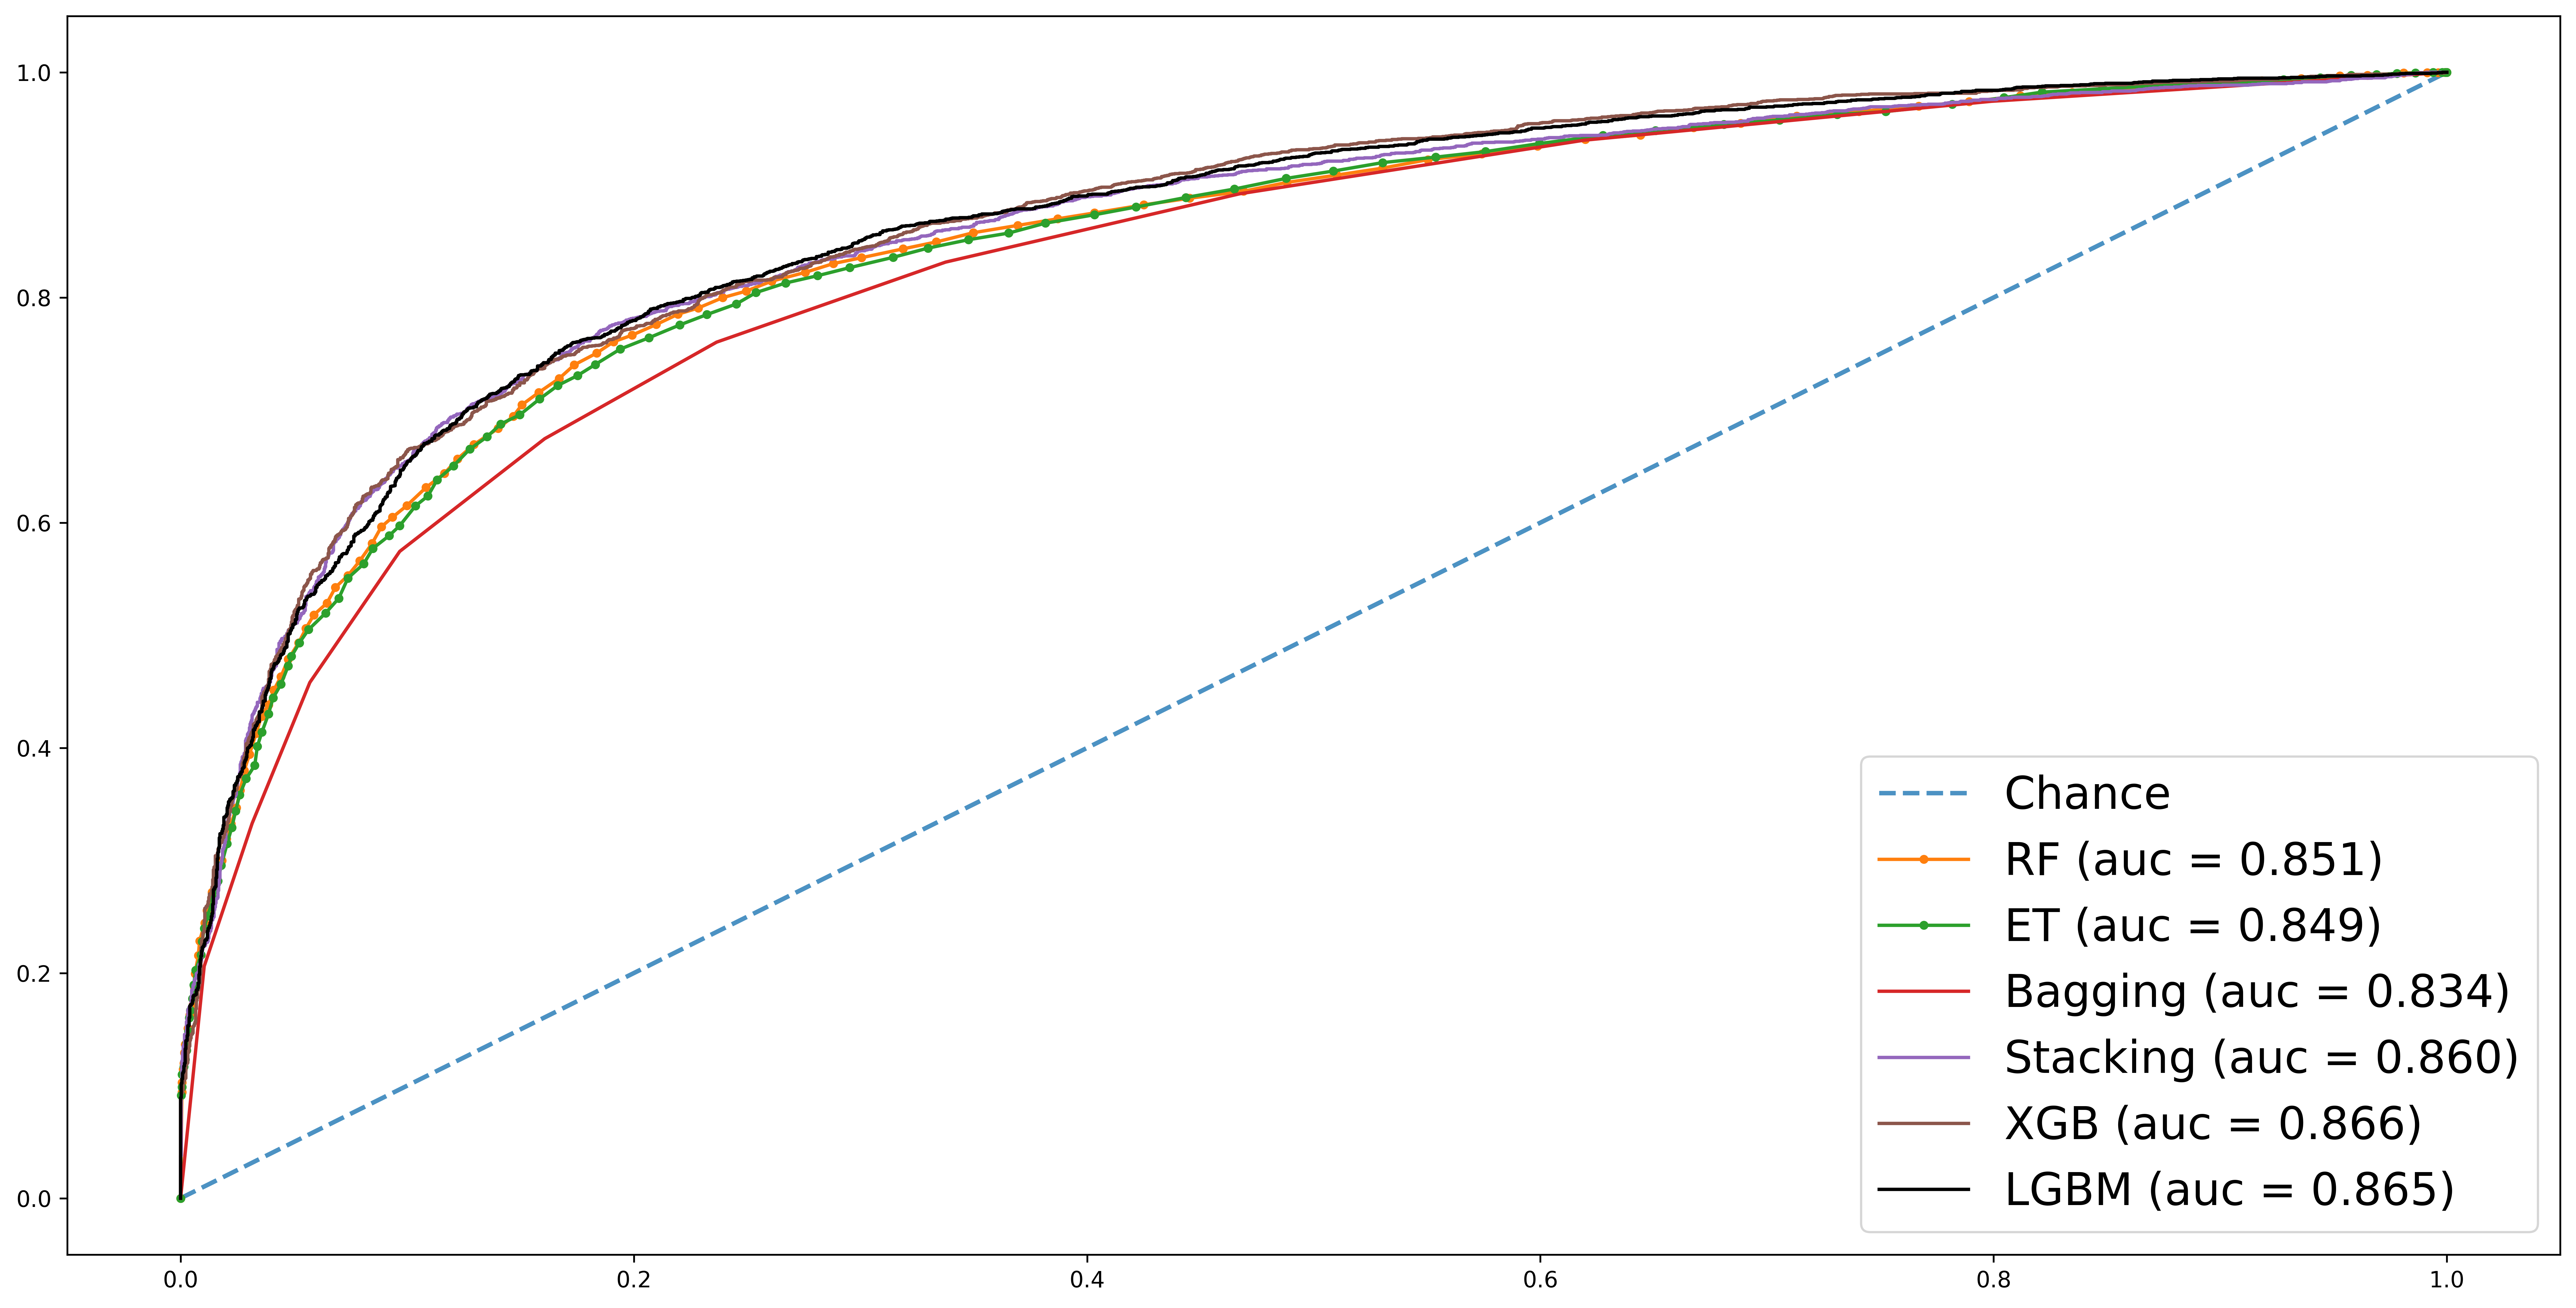

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

xgb_fpr, xgb_tpr, thresholds = roc_curve(y, xgb10[:, 1])
xgb_auc = auc(xgb_fpr, xgb_tpr)


lgbm_fpr, lgbm_tpr, thresholds = roc_curve(y, lgbm10[:, 1])
lgbm_auc = auc(lgbm_fpr, lgbm_tpr)

rf_fpr, rf_tpr, thresholds = roc_curve(y, rf10[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)

bg_fpr, bg_tpr, thresholds = roc_curve(y, bagging10[:, 1])
bg_auc = auc(bg_fpr, bg_tpr)

et_fpr, et_tpr, thresholds = roc_curve(y, et10[:, 1])
et_auc = auc(et_fpr, et_tpr)

st_fpr, st_tpr, thresholds = roc_curve(y, st10[:, 1])
st_auc = auc(st_fpr, st_tpr)




# replace X1 with X_test and Y1 with y_test
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10), dpi=600)
plt.plot([0, 1], [0, 1], linestyle="--", lw=2,  label="Chance", alpha=0.8)
plt.plot(rf_fpr, rf_tpr, marker='.', label='RF (auc = %0.3f)' % rf_auc)
plt.plot(et_fpr, et_tpr, marker='.', label='ET (auc = %0.3f)' % et_auc)
plt.plot(bg_fpr, bg_tpr, linestyle='-', label='Bagging (auc = %0.3f)' % bg_auc)
plt.plot(st_fpr, st_tpr, linestyle='-', label='Stacking (auc = %0.3f)' % st_auc)
# plt.plot(blfpr, bltpr, linestyle='-', label='Blending (RF,LGBM) (auc = %0.3f)' % bl_auc)
plt.plot(xgb_fpr, xgb_tpr, linestyle='-', label='XGB (auc = %0.3f)' % xgb_auc)
plt.plot(lgbm_fpr, lgbm_tpr, linestyle='-',color='black', label='LGBM (auc = %0.3f)' % lgbm_auc)




# plt.xlabel('False Positive Rate -->')
# plt.ylabel('True Positive Rate -->')

plt.legend(loc="lower right", fontsize=20, ncol=1)

plt.show()

In [ ]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are already defined with your data

# Initialize classifiers
clf1 = RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True, random_state=42)
clf2 = LGBMClassifier(random_state=42)
clf3 = XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1, random_state=42)
clf4 = ExtraTreesClassifier(random_state=42)
clf6= BaggingClassifier()

# Define your meta-learner
lr = LogisticRegression(random_state=42)

# Define your stacking classifier with the base learners and meta-learner
clf5 = StackingClassifier(
    estimators=[('xgb', clf3),('rf', clf1) ],final_estimator=lr)

classifiers = {'RF': clf1, 'LGBM': clf2, 'XGB': clf3, 'ET': clf4, 'Stacking': clf5, 'Bagging': clf6}

plt.figure(figsize=(8, 6))

# Perform 5-fold cross-validation for each classifier
for clf_name, clf in classifiers.items():
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf.fit(X_train, y_train)
        y_pred_proba = clf.predict_proba(X_test)[:, 1]

        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        tprs.append(np.interp(mean_fpr, fpr, tpr))

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[0] = 0.0
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, label=f'{clf_name} (Mean AUC = {mean_auc:.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
kfold=StratifiedKFold(n_splits=cv, shuffle=True)

print('10-fold Cross-Validation Random Forest')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf1.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

10-fold Cross-Validation Random Forest
Fold : 1


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Accuracy: 98.62
Sensitivity/Recall: 99.13
Specificity: 98.05
MCC: 0.97236
Precision: 98.28
F1_Score: 98.7
Fold : 2


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Accuracy: 97.7
Sensitivity/Recall: 98.55
Specificity: 96.73
MCC: 0.95388
Precision: 97.15
F1_Score: 97.84
Fold : 3


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Accuracy: 97.24
Sensitivity/Recall: 97.69
Specificity: 96.73
MCC: 0.94457
Precision: 97.13
F1_Score: 97.41
Fold : 4


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Accuracy: 96.93
Sensitivity/Recall: 97.69
Specificity: 96.08
MCC: 0.93844
Precision: 96.57
F1_Score: 97.13
Fold : 5


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Accuracy: 98.16
Sensitivity/Recall: 98.26
Specificity: 98.05
MCC: 0.96306
Precision: 98.26
F1_Score: 98.26
Fold : 6


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Accuracy: 98.01
Sensitivity/Recall: 98.55
Specificity: 97.39
MCC: 0.96001
Precision: 97.7
F1_Score: 98.12
Fold : 7


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Accuracy: 97.55
Sensitivity/Recall: 99.42
Specificity: 95.44
MCC: 0.9513
Precision: 96.08
F1_Score: 97.72
Fold : 8


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Accuracy: 98.93
Sensitivity/Recall: 99.42
Specificity: 98.37
MCC: 0.97848
Precision: 98.56
F1_Score: 98.99
Fold : 9


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Accuracy: 98.31
Sensitivity/Recall: 98.55
Specificity: 98.05
MCC: 0.96614
Precision: 98.27
F1_Score: 98.41
Fold : 10
Accuracy: 97.85
Sensitivity/Recall: 98.26
Specificity: 97.39
MCC: 0.95691
Precision: 97.69
F1_Score: 97.97


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [ ]:
kfold=StratifiedKFold(n_splits=10, shuffle=True)

print('10-fold Cross-Validation LGBM')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf2.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

In [ ]:
kfold=StratifiedKFold(n_splits=10, shuffle=True)

print('10-fold Cross-Validation XGB')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf3.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

10-fold Cross-Validation XGB
Fold : 1
Accuracy: 81.78
Sensitivity/Recall: 84.1
Specificity: 79.15
MCC: 0.63386
Precision: 81.97
F1_Score: 83.02
Fold : 2
Accuracy: 83.13
Sensitivity/Recall: 86.42
Specificity: 79.41
MCC: 0.66108
Precision: 82.6
F1_Score: 84.47
Fold : 3
Accuracy: 80.37
Sensitivity/Recall: 83.82
Specificity: 76.47
MCC: 0.60542
Precision: 80.11
F1_Score: 81.92
Fold : 4
Accuracy: 83.59
Sensitivity/Recall: 85.26
Specificity: 81.7
MCC: 0.67031
Precision: 84.05
F1_Score: 84.65
Fold : 5
Accuracy: 83.44
Sensitivity/Recall: 85.51
Specificity: 81.11
MCC: 0.66731
Precision: 83.57
F1_Score: 84.53
Fold : 6
Accuracy: 80.67
Sensitivity/Recall: 84.93
Specificity: 75.9
MCC: 0.61206
Precision: 79.84
F1_Score: 82.31
Fold : 7
Accuracy: 82.36
Sensitivity/Recall: 86.09
Specificity: 78.18
MCC: 0.64594
Precision: 81.59
F1_Score: 83.78
Fold : 8
Accuracy: 80.98
Sensitivity/Recall: 81.16
Specificity: 80.78
MCC: 0.61885
Precision: 82.6
F1_Score: 81.87
Fold : 9
Accuracy: 81.29
Sensitivity/Recall: 86.

In [ ]:
kfold=StratifiedKFold(n_splits=10, shuffle=True)

print('10-fold Cross-Validation ET')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf4.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

10-fold Cross-Validation ET
Fold : 1


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Accuracy: 79.48
Sensitivity/Recall: 81.79
Specificity: 76.87
MCC: 0.58769
Precision: 79.94
F1_Score: 80.85
Fold : 2


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Accuracy: 80.83
Sensitivity/Recall: 84.68
Specificity: 76.47
MCC: 0.61479
Precision: 80.27
F1_Score: 82.42
Fold : 3


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Accuracy: 83.44
Sensitivity/Recall: 88.15
Specificity: 78.1
MCC: 0.66798
Precision: 81.99
F1_Score: 84.96
Fold : 4


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Accuracy: 76.53
Sensitivity/Recall: 85.26
Specificity: 66.67
MCC: 0.53104
Precision: 74.31
F1_Score: 79.41
Fold : 5


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Accuracy: 81.75
Sensitivity/Recall: 84.06
Specificity: 79.15
MCC: 0.63338
Precision: 81.92
F1_Score: 82.98
Fold : 6


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Accuracy: 80.06
Sensitivity/Recall: 84.35
Specificity: 75.24
MCC: 0.59967
Precision: 79.29
F1_Score: 81.74
Fold : 7


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Accuracy: 82.82
Sensitivity/Recall: 89.28
Specificity: 75.57
MCC: 0.65748
Precision: 80.42
F1_Score: 84.62
Fold : 8


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Accuracy: 80.67
Sensitivity/Recall: 88.41
Specificity: 71.99
MCC: 0.61525
Precision: 78.01
F1_Score: 82.89
Fold : 9


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Accuracy: 79.75
Sensitivity/Recall: 83.77
Specificity: 75.24
MCC: 0.59338
Precision: 79.18
F1_Score: 81.41
Fold : 10
Accuracy: 80.83
Sensitivity/Recall: 84.93
Specificity: 76.22
MCC: 0.6151
Precision: 80.05
F1_Score: 82.42


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [ ]:
kfold=StratifiedKFold(n_splits=10, shuffle=True)

print('10-fold Cross-Validation Stacking')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf5.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

In [ ]:
kfold=StratifiedKFold(n_splits=10, shuffle=True)

print('10-fold Cross-Validation Bagging')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf6.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

# **5FOLD**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
kfold=StratifiedKFold(n_splits=5, shuffle=True)

print('5fold Cross-Validation Random Forest')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf1.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

5fold Cross-Validation Random Forest
Fold : 1


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Accuracy: 77.55
Sensitivity/Recall: 83.07
Specificity: 71.34
MCC: 0.54925
Precision: 76.53
F1_Score: 79.67
Fold : 2


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Accuracy: 99.92
Sensitivity/Recall: 100.0
Specificity: 99.84
MCC: 0.99846
Precision: 99.86
F1_Score: 99.93
Fold : 3


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Accuracy: 100.0
Sensitivity/Recall: 100.0
Specificity: 100.0
MCC: 1.0
Precision: 100.0
F1_Score: 100.0
Fold : 4


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Accuracy: 100.0
Sensitivity/Recall: 100.0
Specificity: 100.0
MCC: 1.0
Precision: 100.0
F1_Score: 100.0
Fold : 5
Accuracy: 100.0
Sensitivity/Recall: 100.0
Specificity: 100.0
MCC: 1.0
Precision: 100.0
F1_Score: 100.0


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [ ]:

print('10-fold Cross-Validation LGBM')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf2.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

In [ ]:

print('10-fold Cross-Validation XGB')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf3.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

In [ ]:


print('10-fold Cross-Validation ET')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf4.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

In [ ]:

print('10-fold Cross-Validation STacking')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf5.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

In [ ]:

print('10-fold Cross-Validation Bagging')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf6.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

# Jacknife **Test**

In [ ]:
clf2=LGBMClassifier()
clf1=RandomForestClassifier(n_estimators=100, max_depth=50, oob_score=True, n_jobs=-1, warm_start=True)
clf3 = XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1)
clf4=ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2)
clf6= BaggingClassifier()
clf7= SVC(kernel='linear')
clf8=KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')

# Define your meta-learner
lr = LogisticRegression(random_state=42)

# Define your stacking classifier with the base learners and meta-learner
clf5 = StackingClassifier(
    estimators=[('xgb', clf3),('rf', clf1) ],final_estimator=lr)

In [ ]:
kfold=KFold(n_splits=len(y), shuffle=True)

print('Jackknife Testing Random Forest')
iterator = 1
acc = 0
sp = 0
sn = 0
mcc = 0
pre = 0
f1 = 0

for train, test in kfold.split(X, y):
  print("Iteration : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf1.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = acc + np.nan_to_num(np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2))
  sp = sp + np.nan_to_num(np.round((tn / (fp + tn)) * 100, 2))
  sn = sn + np.nan_to_num(np.round((tp / (tp + fn)) * 100, 2))
  mcc = mcc + np.nan_to_num(np.round(matthews_corrcoef(Y_test, pred), 5))
  pre = pre + np.nan_to_num(np.round((tp / (tp + fp)) * 100, 2))
  f1 = f1 + np.nan_to_num(np.round(2 * (pre * sn) / (pre + sn), 2))
  iterator = iterator+1

print("Average Accuracy: " + str(np.round(acc/len(y),2)))
print("Average Sensitivity/Recall: " + str(np.round(sn/len(y), 2)))
print("Average Specificity: " + str(np.round(sp/len(y), 2)))
print("Average MCC: " + str(np.round(mcc/len(y), 5)))
print("Average Precision: " + str(np.round(pre/len(y), 2)))
print("Average F1_Score: " + str(np.round(f1/len(y), 2)))

Streaming output truncated to the last 5000 lines.
Iteration : 1528
Iteration : 1529
Iteration : 1530
Iteration : 1531
Iteration : 1532
Iteration : 1533
Iteration : 1534
Iteration : 1535
Iteration : 1536
Iteration : 1537
Iteration : 1538
Iteration : 1539
Iteration : 1540
Iteration : 1541
Iteration : 1542
Iteration : 1543
Iteration : 1544
Iteration : 1545
Iteration : 1546
Iteration : 1547
Iteration : 1548
Iteration : 1549
Iteration : 1550
Iteration : 1551
Iteration : 1552
Iteration : 1553
Iteration : 1554
Iteration : 1555
Iteration : 1556
Iteration : 1557
Iteration : 1558
Iteration : 1559
Iteration : 1560
Iteration : 1561
Iteration : 1562
Iteration : 1563
Iteration : 1564
Iteration : 1565
Iteration : 1566
Iteration : 1567
Iteration : 1568
Iteration : 1569
Iteration : 1570
Iteration : 1571
Iteration : 1572
Iteration : 1573
Iteration : 1574
Iteration : 1575
Iteration : 1576
Iteration : 1577
Iteration : 1578
Iteration : 1579
Iteration : 1580
Iteration : 1581
Iteration : 1582
Iteration : 15

# **Lazy Predict**

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


# Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit and evaluate multiple classifiers
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [04:33<00:00,  9.43s/it]


In [ ]:
models

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
DecisionTreeClassifier             0.79               0.62     0.62      0.79   
XGBClassifier                      0.86               0.61     0.61      0.83   
KNeighborsClassifier               0.85               0.61     0.61      0.83   
LabelSpreading                     0.84               0.61     0.61      0.82   
LGBMClassifier                     0.86               0.60     0.60      0.83   
LabelPropagation                   0.84               0.60     0.60      0.82   
BaggingClassifier                  0.86               0.60     0.60      0.82   
Perceptron                         0.68               0.60     0.60      0.72   
ExtraTreeClassifier                0.77               0.59     0.59      0.77   
RandomForestClassifier             0.86               0.59     0.59      0.82   
ExtraTreesClassifier               0.86               0.58     0.58      0.82   
LinearDiscriminantAnalysis         0.83               0.57     0.57      0.80   
SGDClassifier                      0.83               0.56     0.56      0.80   
LinearSVC                          0.84               0.55     0.55      0.80   
LogisticRegression                 0.84               0.55     0.55      0.79   
RidgeClassifier                    0.85               0.54     0.54      0.79   
CalibratedClassifierCV             0.84               0.53     0.53      0.78   
RidgeClassifierCV                  0.84               0.53     0.53      0.78   
AdaBoostClassifier                 0.84               0.52     0.52      0.78   
PassiveAggressiveClassifier        0.71               0.52     0.52      0.72   
GaussianNB                         0.77               0.52     0.52      0.75   
BernoulliNB                        0.60               0.52     0.52      0.65   
SVC                                0.84               0.52     0.52      0.77   
NearestCentroid                    0.65               0.51     0.51      0.69   
QuadraticDiscriminantAnalysis      0.60               0.50     0.50      0.65   
DummyClassifier                    0.84               0.50     0.50      0.76   

                               Time Taken  
Model                                      
DecisionTreeClassifier               5.23  
XGBClassifier                       52.88  
KNeighborsClassifier                 1.47  
LabelSpreading                       4.23  
LGBMClassifier                       9.65  
LabelPropagation                     3.00  
BaggingClassifier                   37.39  
Perceptron                           0.29  
ExtraTreeClassifier                  0.19  
RandomForestClassifier              15.60  
ExtraTreesClassifier                 3.95  
LinearDiscriminantAnalysis           1.29  
SGDClassifier                        1.12  
LinearSVC                           15.96  
LogisticRegression                   0.66  
RidgeClassifier                      0.39  
CalibratedClassifierCV              57.00  
RidgeClassifierCV                    1.42  
AdaBoostClassifier                  38.17  
PassiveAggressiveClassifier          0.30  
GaussianNB                           0.22  
BernoulliNB                          0.24  
SVC                                 11.05  
NearestCentroid                      0.18  
QuadraticDiscriminantAnalysis        2.13  
DummyClassifier                      0.15

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y1,test_size=.3,random_state =seed)

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from lightgbm import LGBMClassifier
# from sklearn.ensemble import ExtraTreesClassifier

# lgbmbl = LGBMClassifier(random_state=42)
# rfbl=RandomForestClassifier()

# # etbl = ExtraTreesClassifier(random_state=42)

# # Fit the base learners on the training data
# lgbmbl=lgbmbl.fit(X_train, y_train)
# rfbl=rfbl.fit(X_train, y_train)

# lgbm_preds = lgbmbl.predict_proba(X_test)[:, 1]
# et_preds = rfbl.predict_proba(X_test)[:, 1]
# # et_preds = lgbmbl.predict_proba(X_test)[:, 1]

# # Combine the base learner predictions into a blended ensemble
# blend_preds = (lgbm_preds + et_preds) / 2.0

# # Train the meta-learner on the blended ensemble predictions and the true target values
# lr = LogisticRegression(random_state=42)
# blend=lr.fit(blend_preds.reshape(-1, 1), y_test)

# # Make predictions on the blended ensemble using the meta-learner
# final_preds = blend.predict(blend_preds.reshape(-1, 1))

# # Evaluate the performance of the model
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test, final_preds)
# print("Accuracy:", accuracy)



#     # Recall
# recall = recall_score(y_test, final_preds, average='macro')
# print("Recall: ", recall)
#     # Specificity
# tn, fp, fn, tp = confusion_matrix(y_test, final_preds).ravel()
# specificity = tn / (tn+fp)
# print("Specificity: ", specificity)

#     # MCC
# mcc = matthews_corrcoef(y_test, final_preds)
# print("MCC: ", mcc)

Accuracy: 0.8040201005025126
Recall:  0.8056065239551478
Specificity:  0.8222222222222222
MCC:  0.6086129198437551


In [ ]:
from sklearn.metrics import roc_auc_score

# Assuming you have your predicted probabilities and true labels
# y_true = [0, 1, 1, 0, 1]
# y_pred = [0.1, 0.8, 0.6, 0.3, 0.9]

# Compute the AUC score
auc_score = roc_auc_score(y_test, final_preds)
print("AUC Score:", auc_score)


AUC Score: 0.8056065239551478


In [ ]:
# model.predict_proba(X_test)[:1]

array([[0.525, 0.475]])

Independent

NameError: ignored

In [ ]:
dataset

0         1           2             3         4           5    \
0      8857    357892    19175068  1.155648e+09    358140    14436987   
1      2318     47766     1291882  3.929923e+07     47078      973938   
2     57004   5764737   775196721  1.170000e+11   5743994   579405577   
3      1947     39521     1072121  3.283969e+07     37944      765453   
4      6452    223893    10348103  5.381722e+08    222027     7680657   
...     ...       ...         ...           ...       ...         ...   
2619  58001   5951227   812880927  1.250000e+11   6038137   620010867   
2620   1383     21154      427476  9.753274e+06     21542      326532   
2621   5641    178906     7519324  3.555274e+08    168055     5269993   
2622  23072   1502270   130401920  1.275230e+10   1505027    97698650   
2623  97794  12939651  2279154335  4.520000e+11  12923496  1713665672   

               6           7             8             9    ...       513  \
0     7.729948e+08    19217404  7.716718e+08  1.157209e+09  ...    9028.0   
1     2.640892e+07     1236792  2.563788e+07  3.674105e+07  ...    1115.0   
2     7.780258e+10   766477410  7.715775e+10  1.150000e+11  ...  356148.0   
3     2.078980e+07     1002006  2.007115e+07  2.999161e+07  ...       0.0   
4     3.548677e+08    10165539  3.508799e+08  5.224735e+08  ...     365.0   
...            ...         ...           ...           ...  ...       ...   
2619  8.473483e+10   830466211  8.525835e+10  1.270000e+11  ...  189541.0   
2620  6.563960e+06      436806  6.553956e+06  9.969524e+06  ...     511.0   
2621  2.199896e+08     6636743  2.064097e+08  2.962336e+08  ...    3890.0   
2622  8.477146e+09   130871615  8.483054e+09  1.279462e+10  ...   88567.0   
2623  3.020000e+11  2277350436  3.020000e+11  4.510000e+11  ...       0.0   

            514        515        516        517        518        519  \
0       32676.0    59205.0    30863.0    63989.0   139934.0    73331.0   
1         904.0     1899.0     2361.0     3185.0     4681.0     2115.0   
2     1087205.0  1959192.0  1583305.0  2473878.0  4293532.0  2526107.0   
3         912.0     4342.0     1247.0     2626.0     2384.0     3573.0   
4       16252.0    27072.0    14462.0    39852.0    63681.0    31614.0   
...         ...        ...        ...        ...        ...        ...   
2619  1481526.0  1842930.0  1456932.0  2135733.0  4214064.0  1799694.0   
2620      298.0        0.0     1030.0      655.0      609.0      410.0   
2621    13313.0    16484.0    10988.0    18760.0    24801.0     9466.0   
2622   243420.0   284712.0   216177.0   354711.0   479031.0   335596.0   
2623        0.0        0.0        0.0        0.0        0.0        0.0   

            520  521  522  
0       38068.0  0.0  0.0  
1        4232.0  0.0  0.0  
2     1786936.0  0.0  0.0  
3        4025.0  0.0  0.0  
4       23187.0  0.0  0.0  
...         ...  ...  ...  
2619  2065539.0  0.0  0.0  
2620     2221.0  0.0  0.0  
2621    12036.0  0.0  0.0  
2622   316860.0  0.0  0.0  
2623        0.0  0.0  0.0  

[2624 rows x 523 columns]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


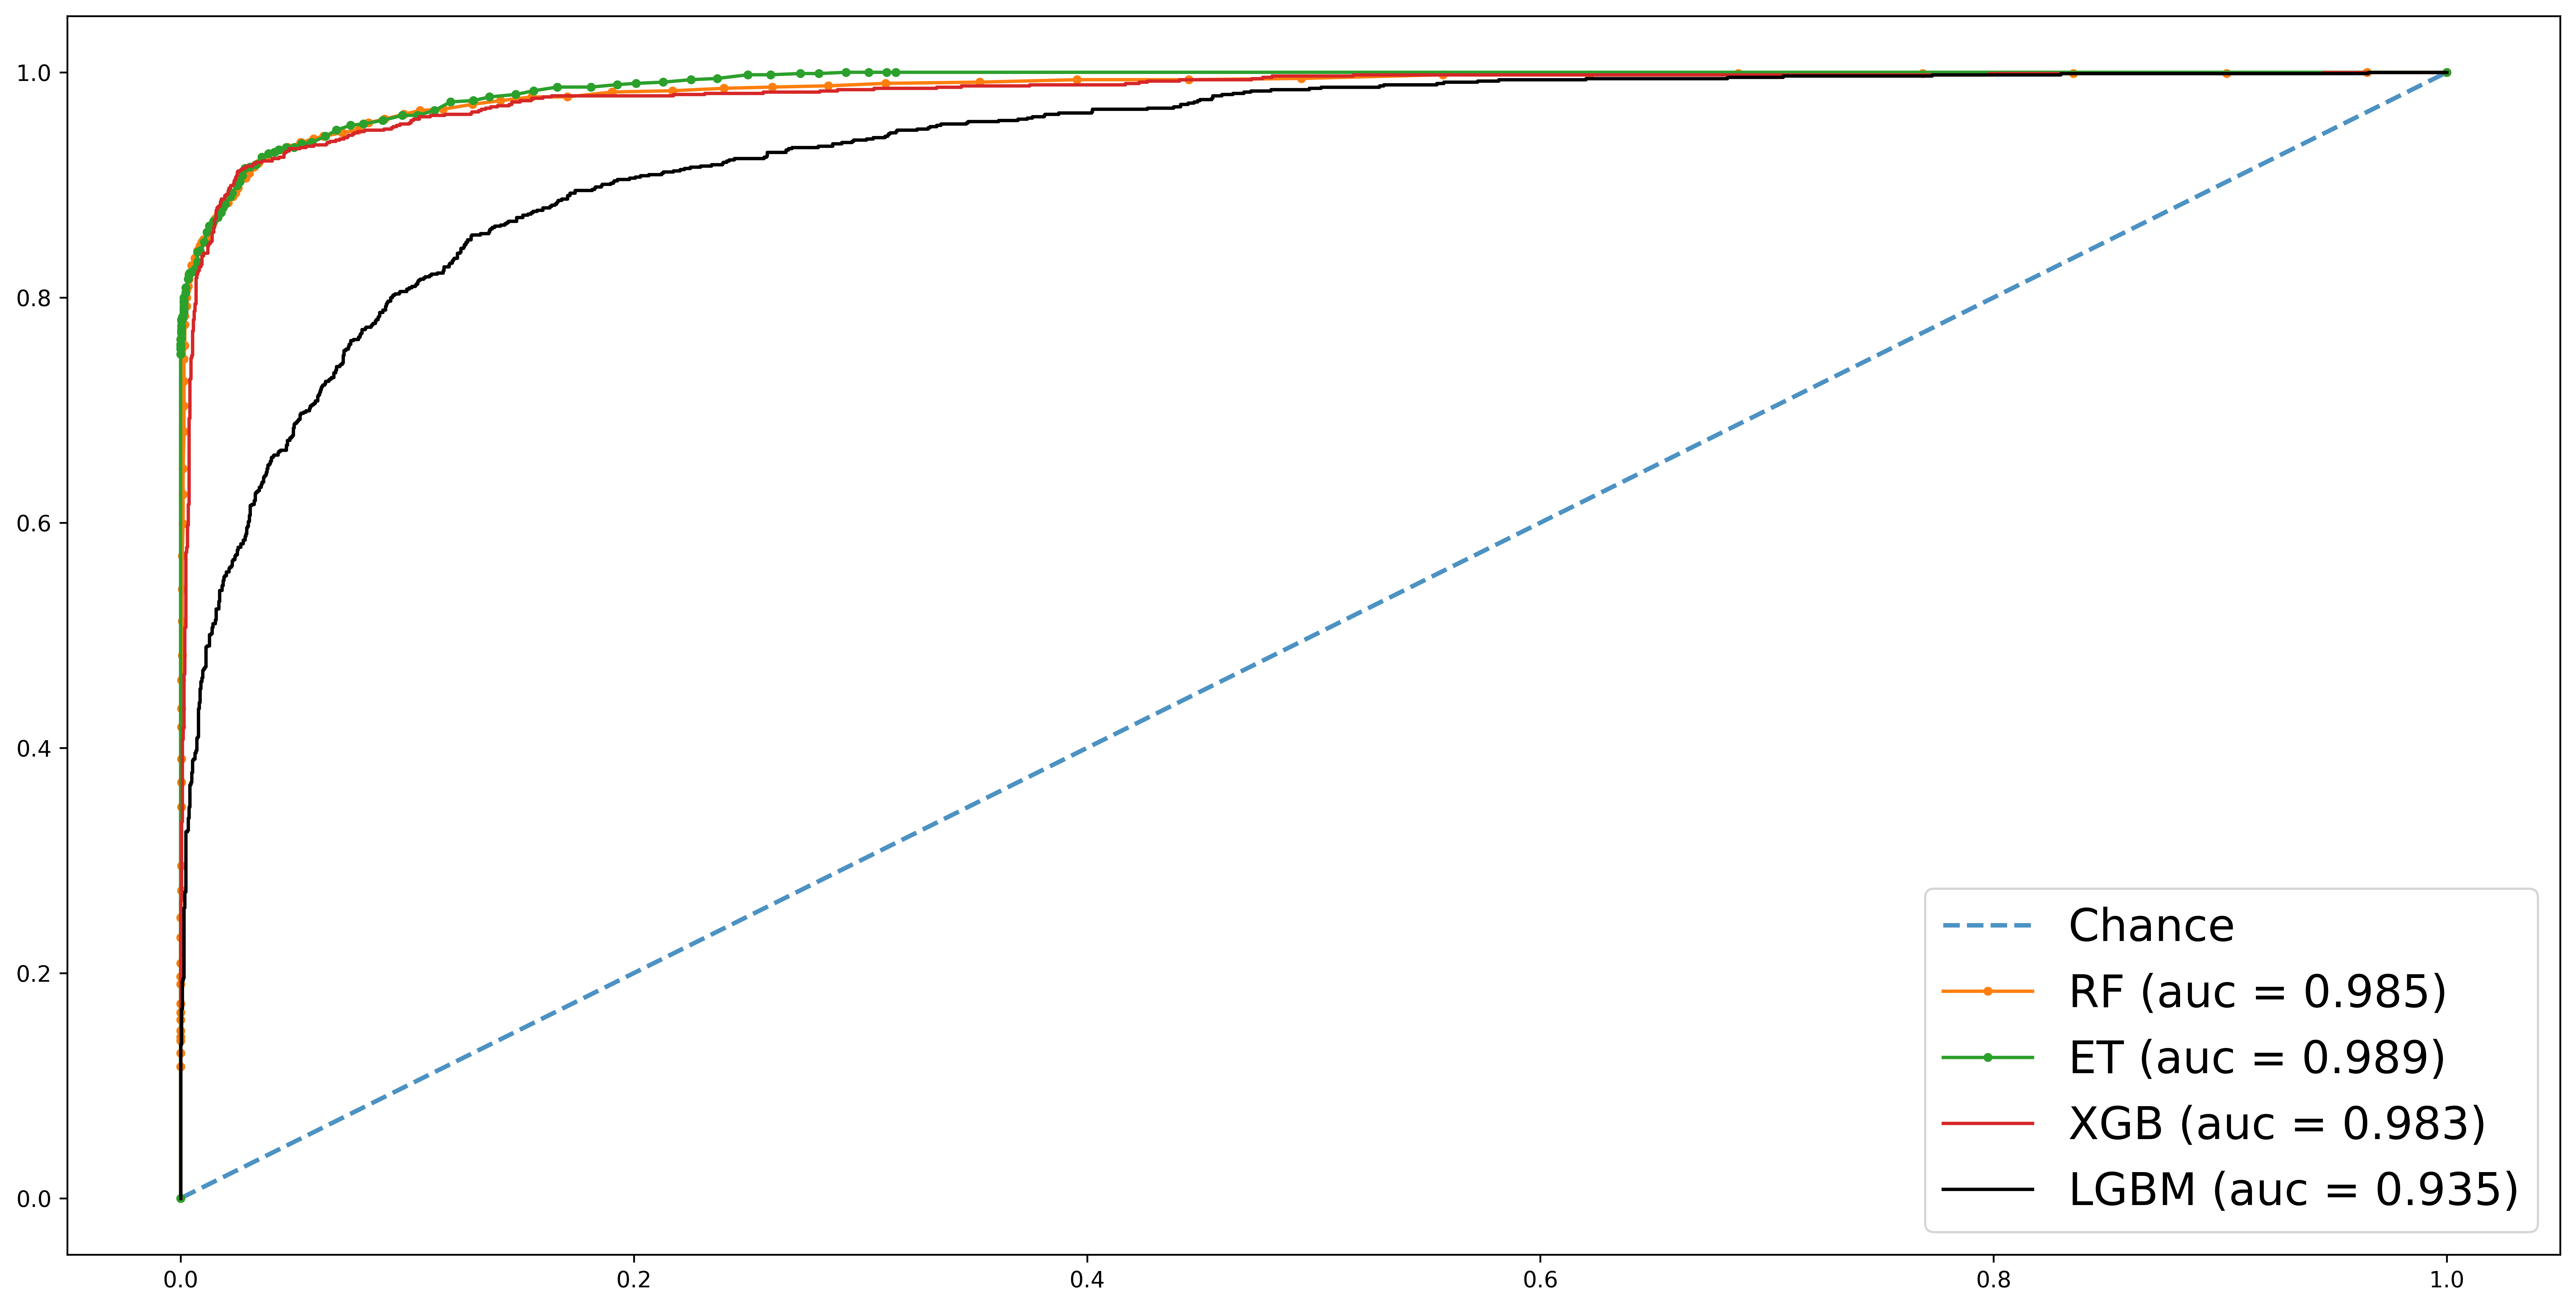

In [ ]:
# replace X1 with X_test and Y1 with y_test
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# st_probs = st.predict_proba(X_test)
# st_probs = st_probs[:, 1]
# # st=st[:, 1]
# st_auc = roc_auc_score(y_test, st_probs)
# st_fpr, st_tpr, threshold = roc_curve(y_test, st_probs)


rf_probs = rf.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
#clf3=clf3[:,1]
rf_auc = roc_auc_score(y_test, rf_probs)
rf_fpr, rf_tpr, threshold = roc_curve(y_test, rf_probs)

# lr_probs = lr.predict_proba(X_test)
# lr_probs = lr_probs[:, 1]
# #clf1=clf1[:,1]
# lr_auc = roc_auc_score(y_test, lr_probs)
# lr_fpr, lr_tpr, threshold = roc_curve(y_test, lr_probs)

#ADA
# ada_probs = ada.predict_proba(X_test)
# ada_probs = ada_probs[:, 1]
# #clf4=clf4[:,1]
# ada_auc = roc_auc_score(y_test, ada_probs)
# ada_fpr, ada_tpr, threshold = roc_curve(y_test, ada_probs)

#MLP
lgbm_probs = lgbm.predict_proba(X_test)
lgbm_probs = lgbm_probs[:, 1]
# clf6=clf6[:,1]
lgbm_auc = roc_auc_score(y_test, lgbm_probs)
lgbm_fpr, lgbm_tpr, thresholdb = roc_curve(y_test, lgbm_probs)

et_probs = et.predict_proba(X_test)
et_probs = et_probs[:, 1]
#clf4=clf4[:,1]
et_auc = roc_auc_score(y_test, et_probs)
et_fpr, et_tpr, threshold = roc_curve(y_test, et_probs)

svc_probs = xgb.predict_proba(X_test)
svc_probs = svc_probs[:, 1]
#clf5=clf5[:,1]
svc_auc = roc_auc_score(y_test, svc_probs)
svc_fpr, svc_tpr, thresholde = roc_curve(y_test, svc_probs)


# final_preds = final_preds.reshape(-1, 1)
# blend_probs = blend.predict_proba(final_preds)
# blend_probs = blend_probs[:, 1]
# #clf5=clf5[:,1]
# blend_auc = roc_auc_score(y_test, blend_probs)
# blend_fpr, blend_tpr, thresholde = roc_curve(y_test, blend_probs)


#['purple', 'orange', 'brown', 'gray', 'pink']

plt.figure(figsize=(20, 10), dpi=600)
plt.plot([0, 1], [0, 1], linestyle="--", lw=2,  label="Chance", alpha=0.8)
plt.plot(rf_fpr, rf_tpr, marker='.', label='RF (auc = %0.3f)' % rf_auc)
plt.plot(et_fpr, et_tpr, marker='.', label='ET (auc = %0.3f)' % et_auc)
plt.plot(svc_fpr, svc_tpr, linestyle='-', label='XGB (auc = %0.3f)' % svc_auc)
# plt.plot(st_fpr, st_tpr, linestyle='-', label='Stacking (XGB,ET,RF,LGBM) (auc = %0.3f)' % st_auc)
# plt.plot(blend_fpr, blend_tpr, linestyle='-', label='Blending (RF,LGBM) (auc = %0.3f)' % blend_auc)
# plt.plot(ada_fpr, ada_tpr, linestyle='-', label='ADA (auc = %0.3f)' % ada_auc)
plt.plot(lgbm_fpr, lgbm_tpr, linestyle='-',color='black', label='LGBM (auc = %0.3f)' % lgbm_auc)




# plt.xlabel('False Positive Rate -->')
# plt.ylabel('True Positive Rate -->')

plt.legend(loc="lower right", fontsize=20, ncol=1)

plt.show()

self Consistency

In [ ]:
# xgbst=XGBClassifier()
# lgbmst = LGBMClassifier()
# etst=ExtraTreesClassifier()
# rfst=RandomForestClassifier()

# # Define your meta-learner
# lr = LogisticRegression(random_state=42)

# Train the stacking classifier on the training data
#st.fit(X_train, y_train)

# Make predictions on the test data
#y_pred = st.predict(X_test)

print('Self-Consistency Random Forest')
rfst_self = rfst.fit(X1, Y1)
pred=np.round(rfst_self.predict(X1))
tn, fp, fn, tp = confusion_matrix(Y1, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y1, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs=[0 for _ in range(len(Y1))]
lr_probs=rfst_self.predict_proba(X1)
# keep probabilities for the positive outcome only
lr_probs=lr_probs[:, 1]

# calculate roc curves
ns_fpr1, ns_tpr1, _=roc_curve(Y1, ns_probs)
lr_fpr1, lr_tpr1, _=roc_curve(Y1, lr_probs)
auc_score = round(roc_auc_score(Y1, lr_probs),2)

print('Self-Consistency-lgbmst')
lgbmst_self=lgbmst.fit(X1, Y1)
pred=np.round(lgbmst_self.predict(X1))
tn, fp, fn, tp = confusion_matrix(Y1, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y1, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs2=[0 for _ in range(len(Y1))]
lr_probs2=lgbmst_self.predict_proba(X1)
# keep probabilities for the positive outcome only
lr_probs2=lr_probs2[:, 1]

# calculate roc curves
ns_fpr2, ns_tpr2, _=roc_curve(Y1, ns_probs2)
lr_fpr2, lr_tpr2, _=roc_curve(Y1, lr_probs2)
auc_score2 = round(roc_auc_score(Y1, lr_probs2),2)

print('Self-Consistency XGB')
xgbst_self=xgbst.fit(X1, Y1)
pred=np.round(xgbst_self.predict(X1))
tn, fp, fn, tp = confusion_matrix(Y1, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y1, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs3=[0 for _ in range(len(Y1))]
lr_probs3=xgbst_self.predict_proba(X1)
# keep probabilities for the positive outcome only
lr_probs3=lr_probs3[:, 1]

# calculate roc curves
ns_fpr3, ns_tpr3, _=roc_curve(Y1, ns_probs3)
lr_fpr3, lr_tpr3, _=roc_curve(Y1, lr_probs3)
auc_score3 = round(roc_auc_score(Y1, lr_probs3),2)


print('Self-Consistency Extra Tree')
et_self=et.fit(X1, Y1)
pred=np.round(et_self.predict(X1))
tn, fp, fn, tp = confusion_matrix(Y1, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y1, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs4=[0 for _ in range(len(Y1))]
lr_probs4=et_self.predict_proba(X1)
# keep probabilities for the positive outcome only
lr_probs4=lr_probs4[:, 1]

# calculate roc curves
ns_fpr4, ns_tpr4, _=roc_curve(Y1, ns_probs4)
lr_fpr4, lr_tpr4, _=roc_curve(Y1, lr_probs4)
auc_score4 = round(roc_auc_score(Y1, lr_probs4),2)



Self-Consistency Random Forest


<ipython-input-17-807f3bfc4854>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfst_self = rfst.fit(X1, Y1)


Accuracy: 100.0
Sensitivity/Recall: 100.0
Specificity: 100.0
MCC: 1.0
Precision: 100.0
F1_Score: 100.0
Self-Consistency-lgbmst


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Accuracy: 94.97
Sensitivity/Recall: 99.96
Specificity: 67.94
MCC: 0.79934
Precision: 94.41
F1_Score: 97.11
Self-Consistency XGB
Accuracy: 99.76
Sensitivity/Recall: 100.0
Specificity: 98.44
MCC: 0.99076
Precision: 99.71
F1_Score: 99.85
Self-Consistency Extra Tree


<ipython-input-17-807f3bfc4854>:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et_self=et.fit(X1, Y1)


Accuracy: 100.0
Sensitivity/Recall: 100.0
Specificity: 100.0
MCC: 1.0
Precision: 100.0
F1_Score: 100.0


In [ ]:
rfself=xgbst.fit(X1, Y1)

In [ ]:
# Define your stacking classifier with the base learners and meta-learner
st = StackingClassifier(
    estimators=[('xgb', xgbst),('et', etst),('lgbm', lgbmst),('rf', rfst) ],final_estimator=lr)

print('Self-Consistency ens')
st_self=st.fit(X1, Y1)
pred=np.round(st_self.predict(X1))
tn, fp, fn, tp = confusion_matrix(Y1, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y1, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs3=[0 for _ in range(len(Y1))]
lr_probs3=st_self.predict_proba(X1)
# keep probabilities for the positive outcome only
lr_probs3=lr_probs3[:, 1]

# calculate roc curves
ns_fpr3, ns_tpr3, _=roc_curve(Y1, ns_probs3)
lr_fpr3, lr_tpr3, _=roc_curve(Y1, lr_probs3)
auc_score4 = round(roc_auc_score(Y1, lr_probs3),2)


Self-Consistency ens
Accuracy: 100.0
Sensitivity/Recall: 100.0
Specificity: 100.0
MCC: 1.0
Precision: 100.0
F1_Score: 100.0


Self consistency Graph

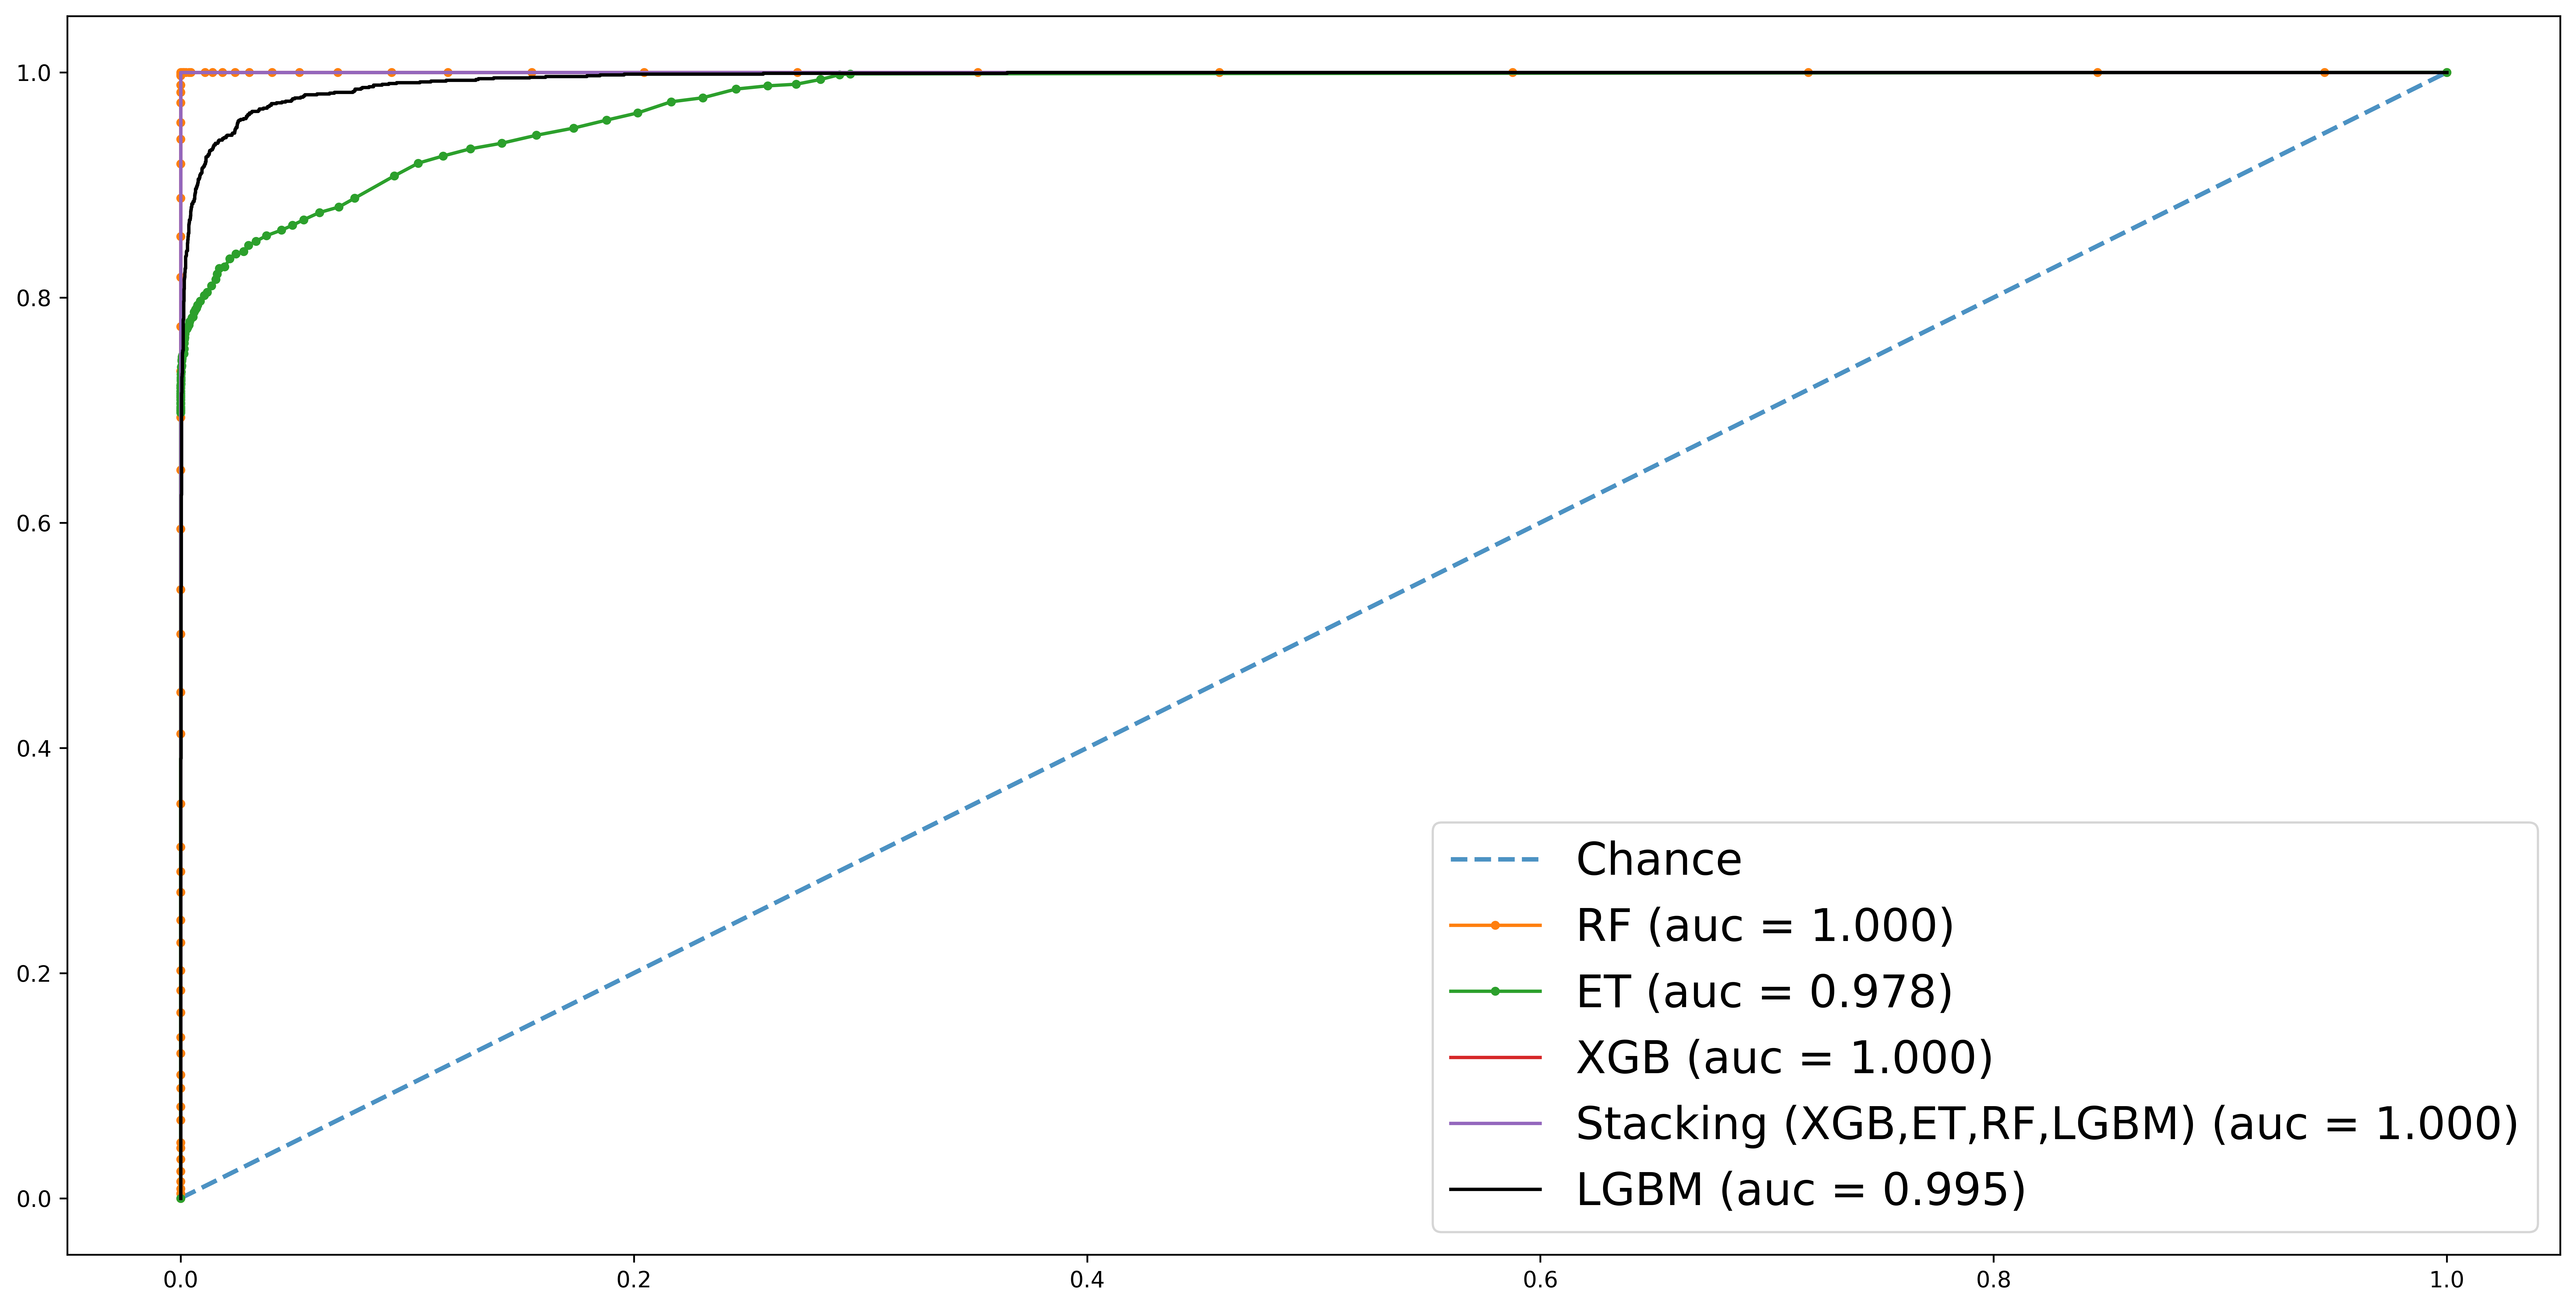

In [ ]:
# replace X1 with X_test and Y1 with y_test
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


st_probs = st_self.predict_proba(X1)
st_probs = st_probs[:, 1]
# st=st[:, 1]
st_auc = roc_auc_score(Y1, st_probs)
st_fpr, st_tpr, threshold = roc_curve(Y1, st_probs)


rf_probs = rfst_self.predict_proba(X1)
rf_probs = rf_probs[:, 1]
#clf3=clf3[:,1]
rf_auc = roc_auc_score(Y1, rf_probs)
rf_fpr, rf_tpr, threshold = roc_curve(Y1, rf_probs)

# lr_probs = lr.predict_proba(X_test)
# lr_probs = lr_probs[:, 1]
# #clf1=clf1[:,1]
# lr_auc = roc_auc_score(y_test, lr_probs)
# lr_fpr, lr_tpr, threshold = roc_curve(y_test, lr_probs)

#ADA
# ada_probs = ada.predict_proba(X_test)
# ada_probs = ada_probs[:, 1]
# #clf4=clf4[:,1]
# ada_auc = roc_auc_score(y_test, ada_probs)
# ada_fpr, ada_tpr, threshold = roc_curve(y_test, ada_probs)

#MLP
lgbm_probs = lgbmst_self.predict_proba(X1)
lgbm_probs = lgbm_probs[:, 1]
# clf6=clf6[:,1]
lgbm_auc = roc_auc_score(Y1, lgbm_probs)
lgbm_fpr, lgbm_tpr, thresholdb = roc_curve(Y1, lgbm_probs)

et_probs = et.predict_proba(X1)
et_probs = et_probs[:, 1]
#clf4=clf4[:,1]
et_auc = roc_auc_score(Y1, et_probs)
et_fpr, et_tpr, threshold = roc_curve(Y1, et_probs)

svc_probs = xgbst_self.predict_proba(X1)
svc_probs = svc_probs[:, 1]
#clf5=clf5[:,1]
svc_auc = roc_auc_score(Y1, svc_probs)
svc_fpr, svc_tpr, thresholde = roc_curve(Y1, svc_probs)


# final_preds = final_preds.reshape(-1, 1)
# blend_probs = blend.predict_proba(final_preds)
# blend_probs = blend_probs[:, 1]
# #clf5=clf5[:,1]
# blend_auc = roc_auc_score(y_test, blend_probs)
# blend_fpr, blend_tpr, thresholde = roc_curve(y_test, blend_probs)


#['purple', 'orange', 'brown', 'gray', 'pink']

plt.figure(figsize=(20, 10), dpi=600)
plt.plot([0, 1], [0, 1], linestyle="--", lw=2,  label="Chance", alpha=0.8)
plt.plot(rf_fpr, rf_tpr, marker='.', label='RF (auc = %0.3f)' % rf_auc)
plt.plot(et_fpr, et_tpr, marker='.', label='ET (auc = %0.3f)' % et_auc)
plt.plot(svc_fpr, svc_tpr, linestyle='-', label='XGB (auc = %0.3f)' % svc_auc)
plt.plot(st_fpr, st_tpr, linestyle='-', label='Stacking (XGB,ET,RF,LGBM) (auc = %0.3f)' % st_auc)
# plt.plot(blend_fpr, blend_tpr, linestyle='-', label='Blending (RF,LGBM) (auc = %0.3f)' % blend_auc)
# plt.plot(ada_fpr, ada_tpr, linestyle='-', label='ADA (auc = %0.3f)' % ada_auc)
plt.plot(lgbm_fpr, lgbm_tpr, linestyle='-',color='black', label='LGBM (auc = %0.3f)' % lgbm_auc)




# plt.xlabel('False Positive Rate -->')
# plt.ylabel('True Positive Rate -->')

plt.legend(loc="lower right", fontsize=20, ncol=1)

plt.show()

Ten- fold

In [ ]:
# xgbst=XGBClassifier()
# lgbmst = LGBMClassifier()
# etst=ExtraTreesClassifier()
# rfst=RandomForestClassifier()
# X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.3, random_state=seed)
kfold=StratifiedKFold(n_splits=10, shuffle=True)

print('10-fold Cross-Validation Random Forest')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  rfst_ten=clf1.fit(X_train, Y_train)
  pred=np.round(rfst_ten.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

10-fold Cross-Validation Random Forest
Fold : 1


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-17-2cdc8569b0a4>:23: RuntimeWarning: invalid value encountered in scalar divide
  pre = np.round((tp / (tp + fp)) * 100, 2)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit

Accuracy: 47.01
Sensitivity/Recall: 0.0
Specificity: 100.0
MCC: 0.0
Precision: nan
F1_Score: nan
Fold : 2


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-17-2cdc8569b0a4>:23: RuntimeWarning: invalid value encountered in scalar divide
  pre = np.round((tp / (tp + fp)) * 100, 2)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Accuracy: 46.93
Sensitivity/Recall: 0.0
Specificity: 100.0
MCC: 0.0
Precision: nan
F1_Score: nan
Fold : 3


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-17-2cdc8569b0a4>:24: RuntimeWarning: invalid value encountered in scalar divide
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Accuracy: 46.78
Sensitivity/Recall: 0.0
Specificity: 99.67
MCC: -0.04168
Precision: 0.0
F1_Score: nan
Fold : 4


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-17-2cdc8569b0a4>:23: RuntimeWarning: invalid value encountered in scalar divide
  pre = np.round((tp / (tp + fp)) * 100, 2)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Accuracy: 46.93
Sensitivity/Recall: 0.0
Specificity: 100.0
MCC: 0.0
Precision: nan
F1_Score: nan
Fold : 5


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-17-2cdc8569b0a4>:23: RuntimeWarning: invalid value encountered in scalar divide
  pre = np.round((tp / (tp + fp)) * 100, 2)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Accuracy: 47.09
Sensitivity/Recall: 0.0
Specificity: 100.0
MCC: 0.0
Precision: nan
F1_Score: nan
Fold : 6


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-17-2cdc8569b0a4>:23: RuntimeWarning: invalid value encountered in scalar divide
  pre = np.round((tp / (tp + fp)) * 100, 2)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Accuracy: 47.09
Sensitivity/Recall: 0.0
Specificity: 100.0
MCC: 0.0
Precision: nan
F1_Score: nan
Fold : 7


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-17-2cdc8569b0a4>:23: RuntimeWarning: invalid value encountered in scalar divide
  pre = np.round((tp / (tp + fp)) * 100, 2)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Accuracy: 47.09
Sensitivity/Recall: 0.0
Specificity: 100.0
MCC: 0.0
Precision: nan
F1_Score: nan
Fold : 8


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-17-2cdc8569b0a4>:23: RuntimeWarning: invalid value encountered in scalar divide
  pre = np.round((tp / (tp + fp)) * 100, 2)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Accuracy: 47.09
Sensitivity/Recall: 0.0
Specificity: 100.0
MCC: 0.0
Precision: nan
F1_Score: nan
Fold : 9


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-17-2cdc8569b0a4>:23: RuntimeWarning: invalid value encountered in scalar divide
  pre = np.round((tp / (tp + fp)) * 100, 2)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Accuracy: 47.09
Sensitivity/Recall: 0.0
Specificity: 100.0
MCC: 0.0
Precision: nan
F1_Score: nan
Fold : 10
Accuracy: 47.09
Sensitivity/Recall: 0.0
Specificity: 100.0
MCC: 0.0
Precision: nan
F1_Score: nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-17-2cdc8569b0a4>:23: RuntimeWarning: invalid value encountered in scalar divide
  pre = np.round((tp / (tp + fp)) * 100, 2)


In [ ]:
print('10-fold Cross-Validation XGB')
iterator = 1
for train, test in kfold.split(X1, Y1):
  print("Fold : " + str(iterator))
  X_train = X1[train]
  Y_train = Y1[train]
  X_test = X1[test]
  Y_test = Y1[test]
  xgbst_ten=xgbst.fit(X_train, Y_train)
  pred=np.round(xgbst_ten.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

10-fold Cross-Validation XGB
Fold : 1
Accuracy: 86.77
Sensitivity/Recall: 98.3
Specificity: 24.11
MCC: 0.36643
Precision: 87.56
F1_Score: 92.62
Fold : 2
Accuracy: 87.87
Sensitivity/Recall: 98.56
Specificity: 29.79
MCC: 0.43795
Precision: 88.41
F1_Score: 93.21
Fold : 3
Accuracy: 87.21
Sensitivity/Recall: 97.91
Specificity: 29.08
MCC: 0.40297
Precision: 88.24
F1_Score: 92.82
Fold : 4
Accuracy: 87.87
Sensitivity/Recall: 97.91
Specificity: 33.33
MCC: 0.4453
Precision: 88.86
F1_Score: 93.17
Fold : 5
Accuracy: 89.31
Sensitivity/Recall: 98.96
Specificity: 36.88
MCC: 0.52241
Precision: 89.49
F1_Score: 93.99
Fold : 6
Accuracy: 86.44
Sensitivity/Recall: 97.78
Specificity: 24.82
MCC: 0.3523
Precision: 87.6
F1_Score: 92.41
Fold : 7
Accuracy: 86.22
Sensitivity/Recall: 98.43
Specificity: 20.42
MCC: 0.32978
Precision: 86.95
F1_Score: 92.33
Fold : 8
Accuracy: 87.21
Sensitivity/Recall: 97.65
Specificity: 30.99
MCC: 0.4123
Precision: 88.4
F1_Score: 92.8
Fold : 9
Accuracy: 87.87
Sensitivity/Recall: 98.95

In [ ]:
print('10-fold Cross-Validation lgbmst')
iterator = 1
for train, test in kfold.split(X1, Y1):
  print("Fold : " + str(iterator))
  X_train = X1[train]
  Y_train = Y1[train]
  X_test = X1[test]
  Y_test = Y1[test]
  lgbmst_ten=lgbmst.fit(X_train, Y_train)
  pred=np.round(lgbmst_ten.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

10-fold Cross-Validation lgbmst
Fold : 1
Accuracy: 87.65
Sensitivity/Recall: 98.3
Specificity: 29.79
MCC: 0.42646
Precision: 88.38
F1_Score: 93.08
Fold : 2
Accuracy: 86.66
Sensitivity/Recall: 98.3
Specificity: 23.4
MCC: 0.35846
Precision: 87.46
F1_Score: 92.56
Fold : 3
Accuracy: 86.66
Sensitivity/Recall: 98.43
Specificity: 22.7
MCC: 0.35634
Precision: 87.37
F1_Score: 92.57
Fold : 4
Accuracy: 88.86
Sensitivity/Recall: 99.35
Specificity: 31.91
MCC: 0.49633
Precision: 88.8
F1_Score: 93.78
Fold : 5
Accuracy: 86.22
Sensitivity/Recall: 98.56
Specificity: 19.15
MCC: 0.32034
Precision: 86.88
F1_Score: 92.35
Fold : 6
Accuracy: 88.53
Sensitivity/Recall: 99.09
Specificity: 31.21
MCC: 0.47646
Precision: 88.67
F1_Score: 93.59
Fold : 7
Accuracy: 87.98
Sensitivity/Recall: 99.22
Specificity: 27.46
MCC: 0.44649
Precision: 88.05
F1_Score: 93.3
Fold : 8
Accuracy: 86.88
Sensitivity/Recall: 98.3
Specificity: 25.35
MCC: 0.3802
Precision: 87.65
F1_Score: 92.67
Fold : 9
Accuracy: 86.22
Sensitivity/Recall: 98.

In [ ]:
print('10-fold Cross-Validation etst')
iterator = 1
for train, test in kfold.split(X1, Y1):
  print("Fold : " + str(iterator))
  X_train = X1[train]
  Y_train = Y1[train]
  X_test = X1[test]
  Y_test = Y1[test]
  etst_ten=etst.fit(X_train, Y_train)
  pred=np.round(etst_ten.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

10-fold Cross-Validation etst
Fold : 1
Accuracy: 86.22
Sensitivity/Recall: 99.48
Specificity: 14.18
MCC: 0.30843
Precision: 86.3
F1_Score: 92.42
Fold : 2
Accuracy: 87.76
Sensitivity/Recall: 99.35
Specificity: 24.82
MCC: 0.42654
Precision: 87.77
F1_Score: 93.2
Fold : 3
Accuracy: 87.32
Sensitivity/Recall: 99.48
Specificity: 21.28
MCC: 0.3959
Precision: 87.29
F1_Score: 92.99
Fold : 4
Accuracy: 86.99
Sensitivity/Recall: 99.35
Specificity: 19.86
MCC: 0.37165
Precision: 87.07
F1_Score: 92.81
Fold : 5
Accuracy: 87.65
Sensitivity/Recall: 99.22
Specificity: 24.82
MCC: 0.41927
Precision: 87.76
F1_Score: 93.14
Fold : 6
Accuracy: 87.76
Sensitivity/Recall: 99.09
Specificity: 26.24
MCC: 0.42715
Precision: 87.95
F1_Score: 93.19
Fold : 7
Accuracy: 86.66
Sensitivity/Recall: 98.95
Specificity: 20.42
MCC: 0.35596
Precision: 87.01
F1_Score: 92.6
Fold : 8
Accuracy: 88.09
Sensitivity/Recall: 99.74
Specificity: 25.35
MCC: 0.45508
Precision: 87.8
F1_Score: 93.39
Fold : 9
Accuracy: 88.2
Sensitivity/Recall: 99.

In [ ]:
stcl = StackingClassifier(
    estimators=[('xgb', xgbst),('et', etst),('lgbm', lgbmst),('rf', rfst) ],final_estimator=lr)

In [ ]:
print('10-fold Cross-Validation ensemble')
kfold=StratifiedKFold(n_splits=10, shuffle=True)
iterator = 1
for train, test in kfold.split(X1, Y1):
  print("Fold : " + str(iterator))
  X_train = X1[train]
  Y_train = Y1[train]
  X_test = X1[test]
  Y_test = Y1[test]
  st_ten=stcl.fit(X_train, Y_train)
  pred=np.round(st_ten.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

10-fold Cross-Validation ensemble
Fold : 1


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Accuracy: 87.76
Sensitivity/Recall: 99.61
Specificity: 23.4
MCC: 0.4271
Precision: 87.6
F1_Score: 93.22
Fold : 2


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Accuracy: 86.22
Sensitivity/Recall: 99.61
Specificity: 13.48
MCC: 0.30815
Precision: 86.21
F1_Score: 92.43
Fold : 3


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Accuracy: 87.43
Sensitivity/Recall: 99.61
Specificity: 21.28
MCC: 0.40415
Precision: 87.3
F1_Score: 93.05
Fold : 4


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Accuracy: 87.32
Sensitivity/Recall: 99.74
Specificity: 19.86
MCC: 0.39706
Precision: 87.12
F1_Score: 93.0
Fold : 5


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Accuracy: 86.77
Sensitivity/Recall: 99.87
Specificity: 15.6
MCC: 0.35661
Precision: 86.54
F1_Score: 92.73
Fold : 6


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Accuracy: 86.77
Sensitivity/Recall: 100.0
Specificity: 14.89
MCC: 0.35884
Precision: 86.46
F1_Score: 92.74
Fold : 7


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Accuracy: 86.99
Sensitivity/Recall: 99.74
Specificity: 18.31
MCC: 0.37918
Precision: 86.8
F1_Score: 92.82
Fold : 8


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Accuracy: 87.54
Sensitivity/Recall: 99.87
Specificity: 21.13
MCC: 0.41993
Precision: 87.21
F1_Score: 93.11
Fold : 9


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Accuracy: 87.76
Sensitivity/Recall: 99.74
Specificity: 23.24
MCC: 0.43351
Precision: 87.5
F1_Score: 93.22
Fold : 10


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Accuracy: 87.09
Sensitivity/Recall: 99.61
Specificity: 19.15
MCC: 0.38
Precision: 86.99
F1_Score: 92.87


In [ ]:
st

array([[0.88822426, 0.11177574],
       [0.88630985, 0.11369015],
       [0.88337454, 0.11662546],
       ...,
       [0.87168781, 0.12831219],
       [0.91860125, 0.08139875],
       [0.91248949, 0.08751051]])

short code for ten-fold

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import auc
cv=5

In [ ]:
# y = Y1.flatten()


NameError: ignored

In [ ]:
lgbm=cross_val_predict(LGBMClassifier(), X1, y, cv=cv,method='predict_proba')

NameError: ignored

In [ ]:
xgb=cross_val_predict(XGBClassifier(),X1, y, cv=cv,method='predict_proba')
et=cross_val_predict(ExtraTreesClassifier(),X1, y, cv=cv,method='predict_proba')
rf=cross_val_predict(RandomForestClassifier(),X1, y, cv=cv,method='predict_proba')
st=cross_val_predict(st, X1, y,cv=cv,method='predict_proba')

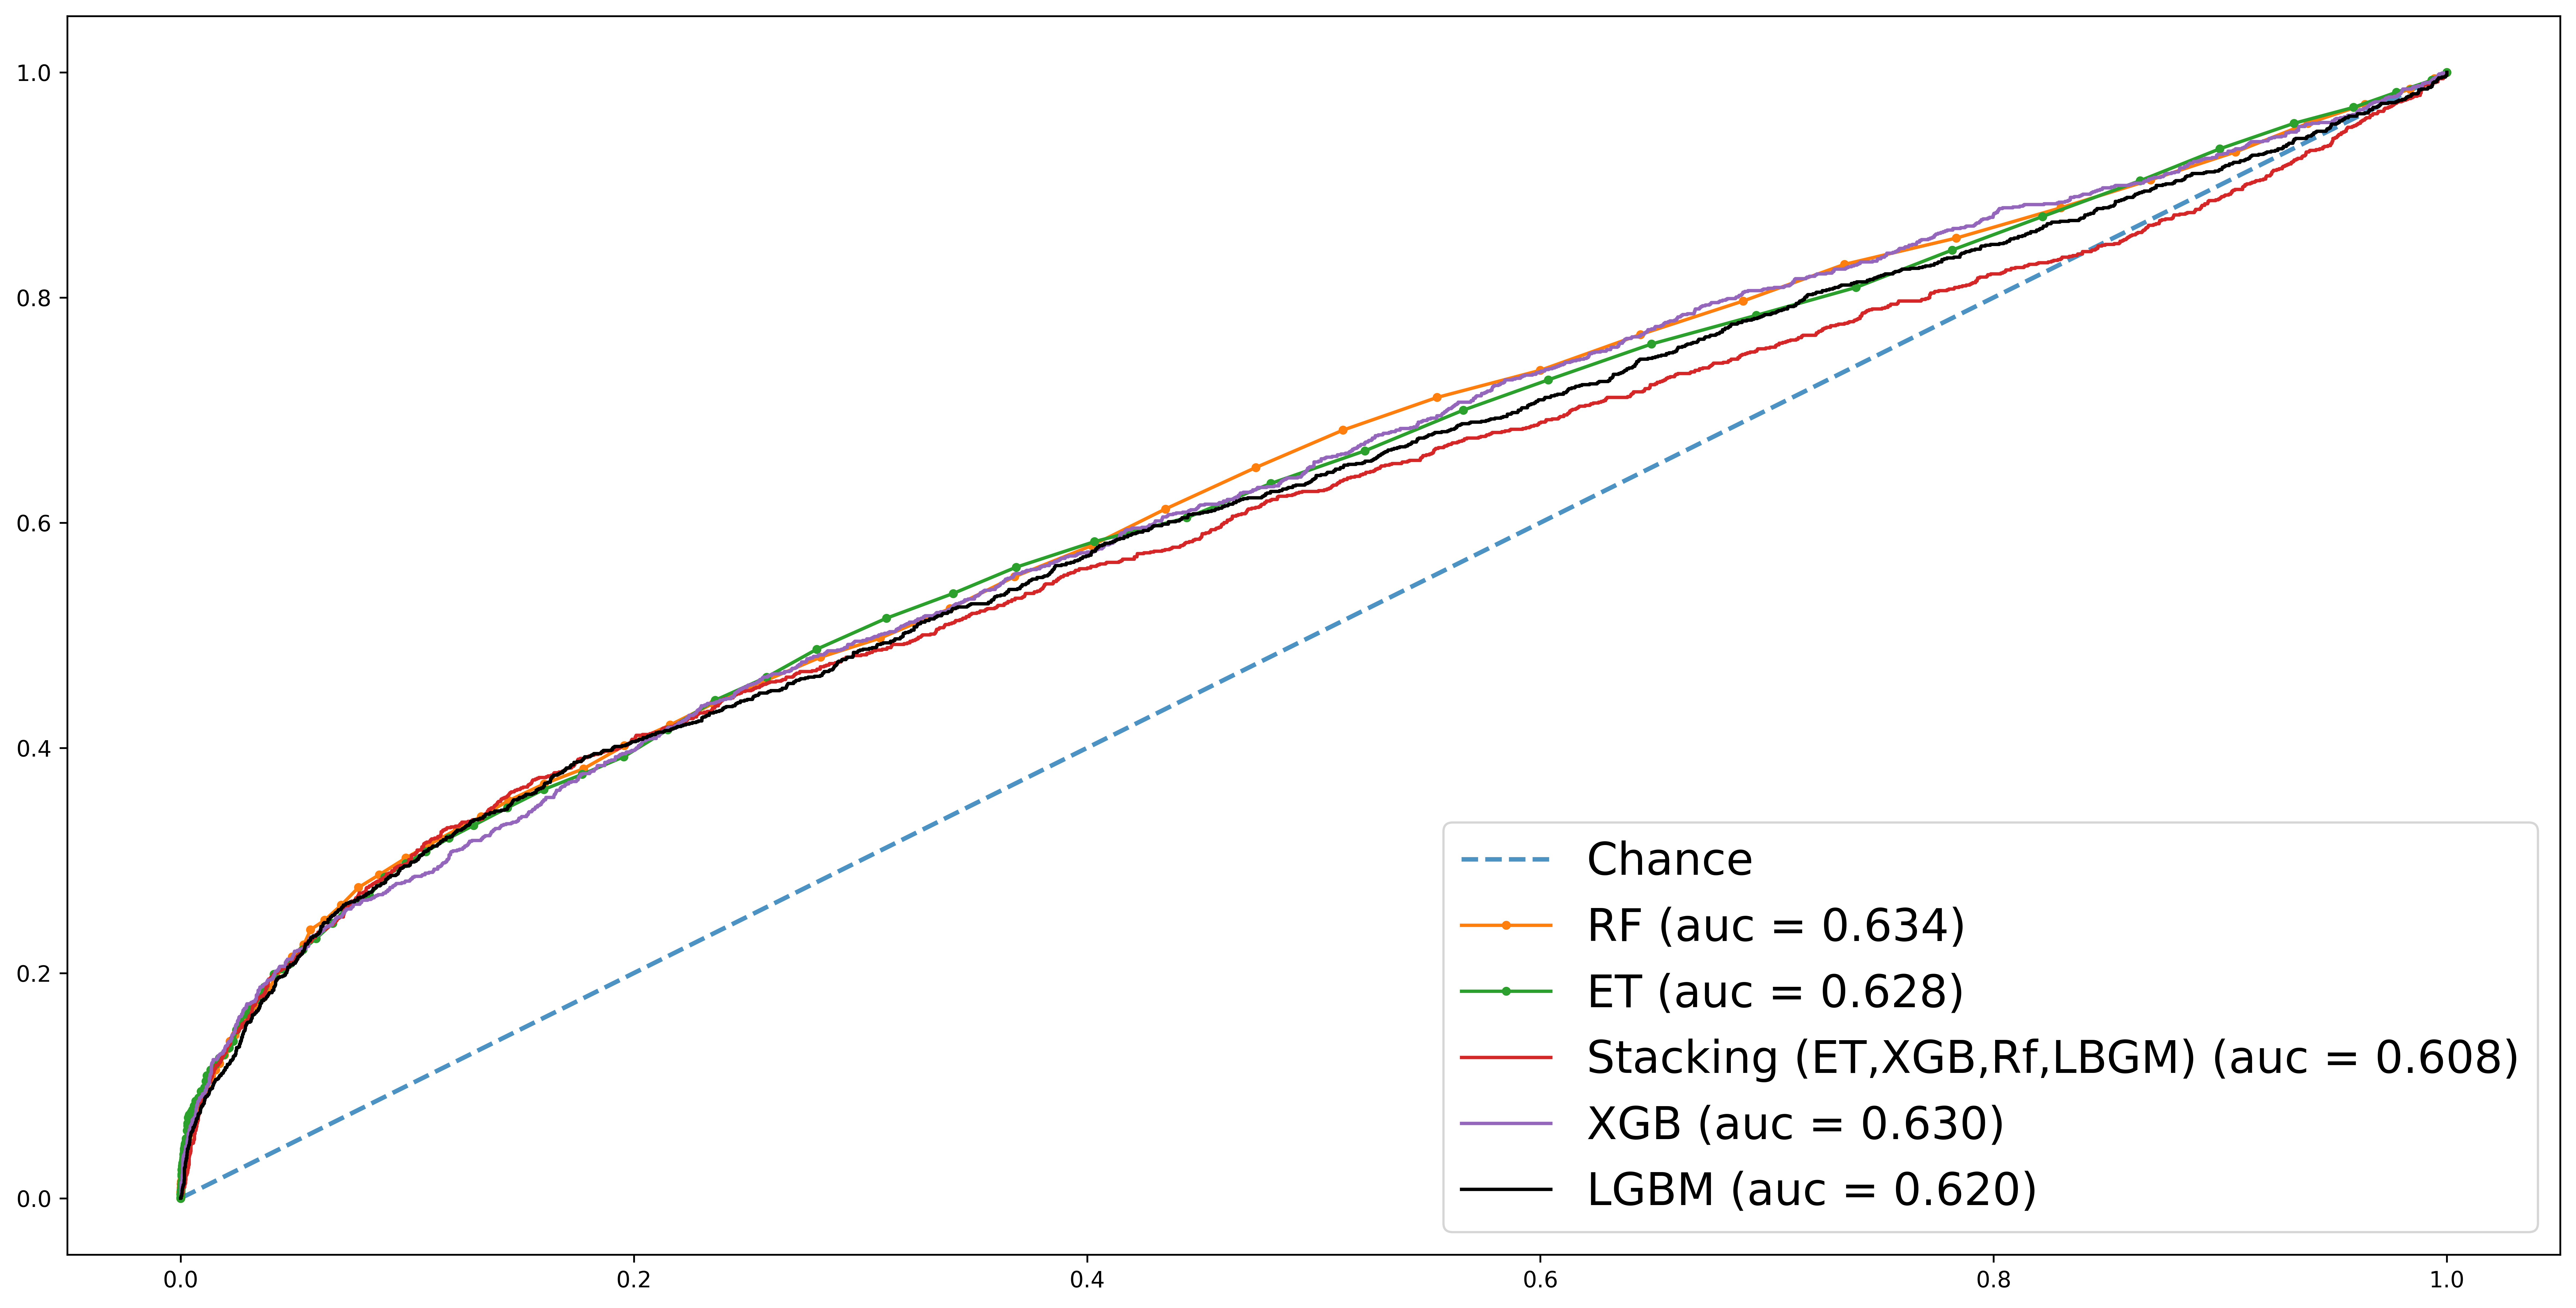

In [ ]:
# # lgbm=cross_val_predict(LGBMClassifier(), X1, Y1, cv=cv,method='predict_proba')

# xgb=cross_val_predict(XGBClassifier(),X1, y, cv=cv,method='predict_proba')


# st=cross_val_predict(st, X1, y,cv=cv,method='predict_proba')



ada_fpr, ada_tpr, thresholds = roc_curve(Y1, xgb[:, 1])
ada_auc = auc(ada_fpr, ada_tpr)


lgbm_fpr, lgbm_tpr, thresholds = roc_curve(Y1, lgbm[:, 1])
lgbm_auc = auc(lgbm_fpr, lgbm_tpr)

rf_fpr, rf_tpr, thresholds = roc_curve(Y1, rf[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)

# svc_fpr, svc_tpr, thresholds = roc_curve(y, svc[:, 1])
# svc_auc = auc(svc_fpr, svc_tpr)

et_fpr, et_tpr, thresholds = roc_curve(Y1, et[:, 1])
et_auc = auc(et_fpr, et_tpr)

st_fpr, st_tpr, thresholds = roc_curve(Y1, st[:, 1])
st_auc = auc(st_fpr, st_tpr)




# replace X1 with X_test and Y1 with y_test
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10), dpi=600)
plt.plot([0, 1], [0, 1], linestyle="--", lw=2,  label="Chance", alpha=0.8)
plt.plot(rf_fpr, rf_tpr, marker='.', label='RF (auc = %0.3f)' % rf_auc)
plt.plot(et_fpr, et_tpr, marker='.', label='ET (auc = %0.3f)' % et_auc)
# plt.plot(svc_fpr, svc_tpr, linestyle='-', label='SVC (auc = %0.3f)' % svc_auc)
plt.plot(st_fpr, st_tpr, linestyle='-', label='Stacking (ET,XGB,Rf,LBGM) (auc = %0.3f)' % st_auc)
# plt.plot(blfpr, bltpr, linestyle='-', label='Blending (RF,LGBM) (auc = %0.3f)' % bl_auc)
plt.plot(ada_fpr, ada_tpr, linestyle='-', label='XGB (auc = %0.3f)' % ada_auc)
plt.plot(lgbm_fpr, lgbm_tpr, linestyle='-',color='black', label='LGBM (auc = %0.3f)' % lgbm_auc)




# plt.xlabel('False Positive Rate -->')
# plt.ylabel('True Positive Rate -->')

plt.legend(loc="lower right", fontsize=20, ncol=1)

plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, roc_auc_score


# # ada=AdaBoostClassifier().fit(X_train,y_train)
# # lgbm=LGBMClassifier().fit(X_train,y_train)
# # rf=RandomForestClassifier().fit(X_train,y_train)
# # svc=SVC(probability=True).fit(X_train,y_train)
# # et=ExtraTreesClassifier().fit(X_train,y_train)


# # Define a list of deep learning models
# models = [ada, lgbm,rf,svc,model,st,blend]

# # Define empty lists to store the false positive rates, true positive rates, and AUC scores for each model
# fpr_list = []
# tpr_list = []
# auc_list = []

# # Loop over the models and compute the ROC curve and AUC score for each one
# for model in models:
#     # Predict the probabilities of the positive class for the test set using the model
#     y_prob = model.predict_proba(X_test)
#     y_prob = y_prob[:, 1]
#     # Compute the false positive rate, true positive rate, and threshold values for the ROC curve
#     fpr, tpr, thresholds = roc_curve(y_test, y_prob)
#     # Compute the AUC score for the ROC curve
#     auc = roc_auc_score(y_test, y_prob)
#     # Append the false positive rate, true positive rate, and AUC score to the corresponding lists
#     fpr_list.append(fpr)
#     tpr_list.append(tpr)
#     auc_list.append(auc)

# # Plot the ROC curves for all models on the same graph
# plt.figure(figsize=(10, 5))
# plt.plot([0, 1], [0, 1], 'k--')
# colors = ['b', 'g', 'r']
# labels = ['LSTM', 'GRU', 'CNN']
# for i in range(len(models)):
#     plt.plot(fpr_list[i], tpr_list[i], color=colors[i], label=labels[i] + ', AUC = {:.3f}'.format(auc_list[i]))
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve')
# # plt.legend(loc='best')
# plt.legend(loc="lower right", fontsize=15, ncol=1)

# plt.show()


Jacknife Testing

In [ ]:
 xgbst=XGBClassifier()
 lgbmst = LGBMClassifier()
 etst=ExtraTreesClassifier()
 rfst=RandomForestClassifier()

In [ ]:
stjk = StackingClassifier(
    estimators=[('xgb', xgbst),('et', etst),('lgbm', lgbmst),('rf', rfst) ],final_estimator=lr)

In [ ]:
kfold=KFold(n_splits=len(Y1), shuffle=True)

print('Jackknife Testing Random Forest')
iterator = 1
acc = 0
sp = 0
sn = 0
mcc = 0
pre = 0
f1 = 0

for train, test in kfold.split(X1, Y1):
  print("Iteration : " + str(iterator))
  X_train = X1[train]
  Y_train = Y1[train]
  X_test = X1[test]
  Y_test = Y1[test]
  rfst_jk=rfst.fit(X_train, Y_train)
  pred=np.round(rfst_jk.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = acc + np.nan_to_num(np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2))
  sp = sp + np.nan_to_num(np.round((tn / (fp + tn)) * 100, 2))
  sn = sn + np.nan_to_num(np.round((tp / (tp + fn)) * 100, 2))
  mcc = mcc + np.nan_to_num(np.round(matthews_corrcoef(Y_test, pred), 5))
  pre = pre + np.nan_to_num(np.round((tp / (tp + fp)) * 100, 2))
  f1 = f1 + np.nan_to_num(np.round(2 * (pre * sn) / (pre + sn), 2))
  iterator = iterator+1

print("Average Accuracy: " + str(np.round(acc/len(Y1),2)))
print("Average Sensitivity/Recall: " + str(np.round(sn/len(Y1), 2)))
print("Average Specificity: " + str(np.round(sp/len(Y1), 2)))
print("Average MCC: " + str(np.round(mcc/len(Y1), 5)))
print("Average Precision: " + str(np.round(pre/len(Y1), 2)))
print("Average F1_Score: " + str(np.round(f1/len(Y1), 2)))

NameError: ignored

In [ ]:
print('Jackknife Testing etst')
iterator = 1
acc = 0
sp = 0
sn = 0
mcc = 0
pre = 0
f1 = 0

for train, test in kfold.split(X1, Y1):
  print("Iteration : " + str(iterator))
  X_train = X1[train]
  Y_train = Y1[train]
  X_test = X1[test]
  Y_test = Y1[test]
  etst_jk=etst.fit(X_train, Y_train)
  pred=np.round(etst_jk.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = acc + np.nan_to_num(np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2))
  sp = sp + np.nan_to_num(np.round((tn / (fp + tn)) * 100, 2))
  sn = sn + np.nan_to_num(np.round((tp / (tp + fn)) * 100, 2))
  mcc = mcc + np.nan_to_num(np.round(matthews_corrcoef(Y_test, pred), 5))
  pre = pre + np.nan_to_num(np.round((tp / (tp + fp)) * 100, 2))
  f1 = f1 + np.nan_to_num(np.round(2 * (pre * sn) / (pre + sn), 2))
  iterator = iterator+1

print("Average Accuracy: " + str(np.round(acc/len(Y1),2)))
print("Average Sensitivity/Recall: " + str(np.round(sn/len(Y1), 2)))
print("Average Specificity: " + str(np.round(sp/len(Y1), 2)))
print("Average MCC: " + str(np.round(mcc/len(Y1), 5)))
print("Average Precision: " + str(np.round(pre/len(Y1), 2)))
print("Average F1_Score: " + str(np.round(f1/len(Y1), 2)))

In [ ]:
print('Jackknife Testing lgbmst')
iterator = 1
acc = 0
sp = 0
sn = 0
mcc = 0
pre = 0
f1 = 0

for train, test in kfold.split(X1, Y1):
  print("Iteration : " + str(iterator))
  X_train = X1[train]
  Y_train = Y1[train]
  X_test = X1[test]
  Y_test = Y1[test]
  lgbmst_jk=lgbmst.fit(X_train, Y_train)
  pred=np.round(lgbmst_jk.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = acc + np.nan_to_num(np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2))
  sp = sp + np.nan_to_num(np.round((tn / (fp + tn)) * 100, 2))
  sn = sn + np.nan_to_num(np.round((tp / (tp + fn)) * 100, 2))
  mcc = mcc + np.nan_to_num(np.round(matthews_corrcoef(Y_test, pred), 5))
  pre = pre + np.nan_to_num(np.round((tp / (tp + fp)) * 100, 2))
  f1 = f1 + np.nan_to_num(np.round(2 * (pre * sn) / (pre + sn), 2))
  iterator = iterator+1

print("Average Accuracy: " + str(np.round(acc/len(Y1),2)))
print("Average Sensitivity/Recall: " + str(np.round(sn/len(Y1), 2)))
print("Average Specificity: " + str(np.round(sp/len(Y1), 2)))
print("Average MCC: " + str(np.round(mcc/len(Y1), 5)))
print("Average Precision: " + str(np.round(pre/len(Y1), 2)))
print("Average F1_Score: " + str(np.round(f1/len(Y1), 2)))

In [ ]:
print('Jackknife Testing xgbst')
iterator = 1
acc = 0
sp = 0
sn = 0
mcc = 0
pre = 0
f1 = 0

for train, test in kfold.split(X1, Y1):
  print("Iteration : " + str(iterator))
  X_train = X1[train]
  Y_train = Y1[train]
  X_test = X1[test]
  Y_test = Y1[test]
  xgbst_jk=xgbst.fit(X_train, Y_train)
  pred=np.round(xgbst_jk.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = acc + np.nan_to_num(np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2))
  sp = sp + np.nan_to_num(np.round((tn / (fp + tn)) * 100, 2))
  sn = sn + np.nan_to_num(np.round((tp / (tp + fn)) * 100, 2))
  mcc = mcc + np.nan_to_num(np.round(matthews_corrcoef(Y_test, pred), 5))
  pre = pre + np.nan_to_num(np.round((tp / (tp + fp)) * 100, 2))
  f1 = f1 + np.nan_to_num(np.round(2 * (pre * sn) / (pre + sn), 2))
  iterator = iterator+1

print("Average Accuracy: " + str(np.round(acc/len(Y1),2)))
print("Average Sensitivity/Recall: " + str(np.round(sn/len(Y1), 2)))
print("Average Specificity: " + str(np.round(sp/len(Y1), 2)))
print("Average MCC: " + str(np.round(mcc/len(Y1), 5)))
print("Average Precision: " + str(np.round(pre/len(Y1), 2)))
print("Average F1_Score: " + str(np.round(f1/len(Y1), 2)))

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit and evaluate multiple classifiers
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

 97%|█████████▋| 28/29 [02:40<00:04,  4.10s/it]

[LightGBM] [Info] Number of positive: 2176, number of negative: 2388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 111826
[LightGBM] [Info] Number of data points in the train set: 4564, number of used features: 442
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.476775 -> initscore=-0.092968
[LightGBM] [Info] Start training from score -0.092968


100%|██████████| 29/29 [02:48<00:00,  5.80s/it]


In [ ]:
models
#ET, lgbm, svc, xgb, ada

#svc, gnb, sgd, lda, passive, lin svc, rf, bagging, ada,

#ET, SVC, lgbm, RF, ADA

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.82               0.82     0.82      0.82   
LGBMClassifier                     0.82               0.81     0.81      0.82   
KNeighborsClassifier               0.81               0.81     0.81      0.81   
RandomForestClassifier             0.81               0.80     0.80      0.81   
ExtraTreesClassifier               0.80               0.79     0.79      0.80   
BaggingClassifier                  0.79               0.78     0.78      0.79   
NuSVC                              0.78               0.77     0.77      0.78   
RidgeClassifierCV                  0.78               0.77     0.77      0.78   
CalibratedClassifierCV             0.77               0.76     0.76      0.77   
LinearSVC                          0.77               0.76     0.76      0.77   
LogisticRegression                 0.77               0.76     0.76      0.77   
RidgeClassifier                    0.77               0.76     0.76      0.76   
LinearDiscriminantAnalysis         0.76               0.75     0.75      0.76   
AdaBoostClassifier                 0.75               0.75     0.75      0.75   
Perceptron                         0.76               0.74     0.74      0.75   
DecisionTreeClassifier             0.72               0.72     0.72      0.72   
SVC                                0.73               0.72     0.72      0.72   
SGDClassifier                      0.70               0.71     0.71      0.70   
LabelPropagation                   0.73               0.71     0.71      0.72   
LabelSpreading                     0.73               0.71     0.71      0.72   
ExtraTreeClassifier                0.69               0.68     0.68      0.69   
PassiveAggressiveClassifier        0.64               0.62     0.62      0.62   
QuadraticDiscriminantAnalysis      0.61               0.59     0.59      0.60   
NearestCentroid                    0.61               0.59     0.59      0.59   
BernoulliNB                        0.61               0.59     0.59      0.59   
GaussianNB                         0.62               0.59     0.59      0.57   
DummyClassifier                    0.54               0.50     0.50      0.38   

                               Time Taken  
Model                                      
XGBClassifier                        8.28  
LGBMClassifier                       8.09  
KNeighborsClassifier                 0.68  
RandomForestClassifier               9.29  
ExtraTreesClassifier                 1.98  
BaggingClassifier                   28.87  
NuSVC                               10.55  
RidgeClassifierCV                    0.71  
CalibratedClassifierCV              40.09  
LinearSVC                            8.23  
LogisticRegression                   0.79  
RidgeClassifier                      0.22  
LinearDiscriminantAnalysis           0.88  
AdaBoostClassifier                  28.55  
Perceptron                           0.26  
DecisionTreeClassifier               2.54  
SVC                                  9.38  
SGDClassifier                        0.60  
LabelPropagation                     2.50  
LabelSpreading                       3.39  
ExtraTreeClassifier                  0.13  
PassiveAggressiveClassifier          0.27  
QuadraticDiscriminantAnalysis        0.73  
NearestCentroid                      0.22  
BernoulliNB                          0.55  
GaussianNB                           0.14  
DummyClassifier                      0.11

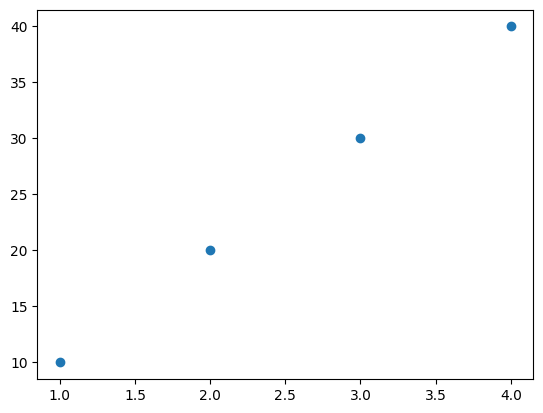

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame
df = pd.DataFrame({'x': [1, 2, 3, 4], 'y': [10, 20, 30, 40]})

# Create a scatter plot using the DataFrame as the data source
plt.scatter(data=df, x='x', y='y')
plt.show()


x   y
0  1  10
1  2  20
2  3  30
3  4  40